# New Zealand Accomodation and Tourism Data

# Data Wrangling and Exploratory Data Analysis

In this notebook, we aim to examine time series data from the New Zealand government regarding its tourism and visitors to see what interesting information we can glean from these datasets. Our end goal is to perform forecasting predictions on these datasets as borders open following the COVID-19 pandemic and how the country can prepare itself for an influx of visitors.

This dataset was downloaded from the New Zealand government's data store website: https://infoshare.stats.govt.nz/

I was able to query the website for specific datasets of interest. The website contains all sorts of data from population, visa, travel, tourism, and business data. It is a wealth of information for any data scientist to explore. I chose to look at the data specifically referring to the Accomodation Occupancy and Capacity data that was organized by region. I also looked at visitor entries for each New Zealand port and their reason for visiting.

In [1]:
# Load the usual things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.0 Data Cleaning

Our first step is to make sure the data is clean. Lets start with our "Accomodation Occupation and Capacity" data to see what's going on.

In [2]:
accomodation = pd.read_csv("../NZ Data/Accomodation Occupancy and Capacity by Region - Original.csv", header = None)

In [3]:
#Lets explore our data and see what's going on with it! 
accomodation

0    \
0                               NaN   
1                                     
2                                     
3                           2001M01   
4                           2001M02   
..                              ...   
250                             NaN   
251  Source: Statistics New Zealand   
252     Contact: Information Centre   
253         Telephone: 0508 525 525   
254        Email:info@stats.govt.nz   

                                                1    \
0                                             Total   
1                                         Northland   
2    Capacity, monthly (stay-unit-nights available)   
3                                            322710   
4                                            291508   
..                                              ...   
250                                             NaN   
251                                             NaN   
252                                             NaN   
253                                             NaN   
254                                             NaN   

                                            2    \
0                                           NaN   
1                                           NaN   
2    Occupancy, monthly (stay-unit-nights used)   
3                                        120769   
4                                         84755   
..                                          ...   
250                                         NaN   
251                                         NaN   
252                                         NaN   
253                                         NaN   
254                                         NaN   

                                                3    \
0                                               NaN   
1                                          Auckland   
2    Capacity, monthly (stay-unit-nights available)   
3                                            496093   
4                                            444388   
..                                              ...   
250                                             NaN   
251                                             NaN   
252                                             NaN   
253                                             NaN   
254                                             NaN   

                                            4    \
0                                           NaN   
1                                           NaN   
2    Occupancy, monthly (stay-unit-nights used)   
3                                        280342   
4                                        267818   
..                                          ...   
250                                         NaN   
251                                         NaN   
252                                         NaN   
253                                         NaN   
254                                         NaN   

                                                5    \
0                                               NaN   
1                                        Coromandel   
2    Capacity, monthly (stay-unit-nights available)   
3                                            131316   
4                                            118944   
..                                              ...   
250                                             NaN   
251                                             NaN   
252                                             NaN   
253                                             NaN   
254                                             NaN   

                                            6    \
0                                           NaN   
1                                           NaN   
2    Occupancy, monthly (stay-unit-nights used)   
3                                         66529   
4                                         33820   
..                                          ... 

## 1.1.0 Accomodation Dataset Cleaning

It seems like there will be a good amount of cleaning that needs to be done. This was downloaded from a government website and as such there is some extra information provided that we don't necessarily need. These next few steps will be cleaning up the data and making it ready for exploration. We want to make the data machine readable and to really focus on the information at hand.

Some information on the dataset as a whole:
- Monthly capacity is how much space is available on a monthly basis
- Monthly occupancy is how much space is occupied on a monthly basis

From first glance, it seems that the data at the end may be extra strings that contain no numerical data and the first few rows are strings that explain the data in each column but is not populating each column. We will fill in the missing data.

In [4]:
# Investigate the end of the dataframe
# We want to see where the strings end
accomodation.tail(28)

0       1      2       3    \
227                                            2019M09  283710  57178  619710   
228                                 Table information:     NaN    NaN     NaN   
229                                             Units:     NaN    NaN     NaN   
230                          Number, Magnitude = Units     NaN    NaN     NaN   
231                                                NaN     NaN    NaN     NaN   
232                                         Footnotes:     NaN    NaN     NaN   
233                                                        NaN    NaN     NaN   
234                                           Symbols:     NaN    NaN     NaN   
235                            .. figure not available     NaN    NaN     NaN   
236                                    C: Confidential     NaN    NaN     NaN   
237                                  E: Early Estimate     NaN    NaN     NaN   
238                                     P: Provisional     NaN    NaN     NaN   
239                                         R: Revised     NaN    NaN     NaN   
240                                      S: Suppressed     NaN    NaN     NaN   
241                                                NaN     NaN    NaN     NaN   
242                     Status flags are not displayed     NaN    NaN     NaN   
243                                                NaN     NaN    NaN     NaN   
244                                  Table reference:      NaN    NaN     NaN   
245                                           ACS025AA     NaN    NaN     NaN   
246                                                NaN     NaN    NaN     NaN   
247                                      Last updated:     NaN    NaN     NaN   
248  Capacity, monthly (stay-unit-nights available)...     NaN    NaN     NaN   
249  Occupancy, monthly (stay-unit-nights used): 14...     NaN    NaN     NaN   
250                                                NaN     NaN    NaN     NaN   
251                     Source: Statistics New Zealand     NaN    NaN     NaN   
252                        Contact: Information Centre     NaN    NaN     NaN   
253                            Telephone: 0508 525 525     NaN    NaN     NaN   
254                           Email:info@stats.govt.nz     NaN    NaN     NaN   

        4       5      6       7      8       9    ...    321   322    323  \
227  410042  149100  23059  160650  65776  139440  ...  16230  3879  11940   
228     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
229     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
230     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
231     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
232     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
233     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
234     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
235     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
236     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
237     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
238     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
239     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
240     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
241     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
242     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
243     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
244     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
245     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
246     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN   NaN    NaN   
247     NaN     NaN    NaN     NaN    NaN     NaN  ...    NaN  

In [5]:
# We know the last 27 rows are not useful, lets drop these and clean up the tail

accomodation.drop(accomodation.tail(27).index, inplace = True)
accomodation.tail()

0       1      2       3       4       5      6       7      8    \
223  2019M05  297631  63720  634229  373430  155744  21569  166222  61703   
224  2019M06  286620  49383  615720  333070  148950  20695  160470  64292   
225  2019M07  290098  53223  634353  363862  153078  19976  164269  60439   
226  2019M08  285107  54631  632741  382395  153481  19263  162936  57956   
227  2019M09  283710  57178  619710  410042  149100  23059  160650  65776   

        9    ...    321   322    323   324    325   326    327   328      329  \
223  142755  ...  16771  3778  12338   777  27559  4606  17484  1845  1515280   
224  138570  ...  16230  2783  11940    ..  26670  2810  13320  1049  1432050   
225  143189  ...  16771  2953  11687    ..  27559  3229  13764  1074  1497021   
226  143189  ...  16771  2872  12338    ..  28644    ..  16244  1280  1479010   
227  139440  ...  16230  3879  11940  1363  27720    ..  15720  1826  1513380   

        330  
223  199289  
224  167047  
225  180786  
226  170038  
227  197896  

[5 rows x 331 columns]

## 1.1.1 Cleaning up the header columns

Now that we've cleaned up the tail of the data, lets clean up those first few rows we saw.
We'll first shorten the length of the strings, fill in missing values, and then combine them into one string. 

In [6]:
# Replace the lengthy Capacity and Occupancy strings with just occupancy and capacity

accomodation.iloc[2] = accomodation.iloc[2].str.replace(r'^Capacity.*$', 'Capacity', regex = True)
accomodation.iloc[2] = accomodation.iloc[2].str.replace(r'^Occupancy.*$', 'Occupancy', regex = True)
accomodation.head()

0          1          2         3          4           5          6    \
0      NaN      Total        NaN       NaN        NaN         NaN        NaN   
1           Northland        NaN  Auckland        NaN  Coromandel        NaN   
2            Capacity  Occupancy  Capacity  Occupancy    Capacity  Occupancy   
3  2001M01     322710     120769    496093     280342      131316      66529   
4  2001M02     291508      84755    444388     267818      118944      33820   

        7          8              9    ...       321        322       323  \
0       NaN        NaN            NaN  ...       NaN        NaN       NaN   
1   Waikato        NaN  Bay of Plenty  ...   Dunedin        NaN    Clutha   
2  Capacity  Occupancy       Capacity  ...  Capacity  Occupancy  Capacity   
3    134261      45190         137082  ...     18321       6277      8804   
4    121772      40636         122780  ...     16548       4722      7952   

         324        325        326        327        328                329  \
0        NaN        NaN        NaN        NaN        NaN                NaN   
1        NaN  Fiordland        NaN  Southland        NaN  Total New Zealand   
2  Occupancy   Capacity  Occupancy   Capacity  Occupancy           Capacity   
3       2534      12059         ..      29853         ..            1713649   
4       1748      10892         ..      26964         ..            1541876   

         330  
0        NaN  
1        NaN  
2  Occupancy  
3     557313  
4     276204  

[5 rows x 331 columns]

In [7]:
# Now that the strings are shortened, lets fill in the missing rows.
# We know that each region will have a "capacity" and "occupancy"
# I will fill in the blanks of the locations by using fillna and forwardfill

accomodation.iloc[1] = accomodation.iloc[1].fillna(method = 'ffill')
accomodation.head()

0          1          2         3          4           5           6    \
0      NaN      Total        NaN       NaN        NaN         NaN         NaN   
1           Northland  Northland  Auckland   Auckland  Coromandel  Coromandel   
2            Capacity  Occupancy  Capacity  Occupancy    Capacity   Occupancy   
3  2001M01     322710     120769    496093     280342      131316       66529   
4  2001M02     291508      84755    444388     267818      118944       33820   

        7          8              9    ...       321        322       323  \
0       NaN        NaN            NaN  ...       NaN        NaN       NaN   
1   Waikato    Waikato  Bay of Plenty  ...   Dunedin    Dunedin    Clutha   
2  Capacity  Occupancy       Capacity  ...  Capacity  Occupancy  Capacity   
3    134261      45190         137082  ...     18321       6277      8804   
4    121772      40636         122780  ...     16548       4722      7952   

         324        325        326        327        328                329  \
0        NaN        NaN        NaN        NaN        NaN                NaN   
1     Clutha  Fiordland  Fiordland  Southland  Southland  Total New Zealand   
2  Occupancy   Capacity  Occupancy   Capacity  Occupancy           Capacity   
3       2534      12059         ..      29853         ..            1713649   
4       1748      10892         ..      26964         ..            1541876   

                 330  
0                NaN  
1  Total New Zealand  
2          Occupancy  
3             557313  
4             276204  

[5 rows x 331 columns]

In [8]:
# We will do the same for the accomodation names

accomodation.iloc[0] = accomodation.iloc[0].fillna(method = 'ffill')
accomodation.head()

0          1          2         3          4           5           6    \
0      NaN      Total      Total     Total      Total       Total       Total   
1           Northland  Northland  Auckland   Auckland  Coromandel  Coromandel   
2            Capacity  Occupancy  Capacity  Occupancy    Capacity   Occupancy   
3  2001M01     322710     120769    496093     280342      131316       66529   
4  2001M02     291508      84755    444388     267818      118944       33820   

        7          8              9    ...            321            322  \
0     Total      Total          Total  ...  Holiday parks  Holiday parks   
1   Waikato    Waikato  Bay of Plenty  ...        Dunedin        Dunedin   
2  Capacity  Occupancy       Capacity  ...       Capacity      Occupancy   
3    134261      45190         137082  ...          18321           6277   
4    121772      40636         122780  ...          16548           4722   

             323            324            325            326            327  \
0  Holiday parks  Holiday parks  Holiday parks  Holiday parks  Holiday parks   
1         Clutha         Clutha      Fiordland      Fiordland      Southland   
2       Capacity      Occupancy       Capacity      Occupancy       Capacity   
3           8804           2534          12059             ..          29853   
4           7952           1748          10892             ..          26964   

             328                329                330  
0  Holiday parks      Holiday parks      Holiday parks  
1      Southland  Total New Zealand  Total New Zealand  
2      Occupancy           Capacity          Occupancy  
3             ..            1713649             557313  
4             ..            1541876             276204  

[5 rows x 331 columns]

In [9]:
# Lets turn them into one singular string so we can use them as one header column 
# We join these columns together

accomodation.iloc[0,1:] = accomodation.iloc[0:3,1:].agg(''.join)
accomodation.head()

0                       1                        2    \
0      NaN  TotalNorthlandCapacity  TotalNorthlandOccupancy   
1                        Northland                Northland   
2                         Capacity                Occupancy   
3  2001M01                  322710                   120769   
4  2001M02                  291508                    84755   

                     3                       4                        5    \
0  TotalAucklandCapacity  TotalAucklandOccupancy  TotalCoromandelCapacity   
1               Auckland                Auckland               Coromandel   
2               Capacity               Occupancy                 Capacity   
3                 496093                  280342                   131316   
4                 444388                  267818                   118944   

                        6                     7                      8    \
0  TotalCoromandelOccupancy  TotalWaikatoCapacity  TotalWaikatoOccupancy   
1                Coromandel               Waikato                Waikato   
2                 Occupancy              Capacity              Occupancy   
3                     66529                134261                  45190   
4                     33820                121772                  40636   

                          9    ...                           321  \
0  TotalBay of PlentyCapacity  ...  Holiday parksDunedinCapacity   
1               Bay of Plenty  ...                       Dunedin   
2                    Capacity  ...                      Capacity   
3                      137082  ...                         18321   
4                      122780  ...                         16548   

                             322                          323  \
0  Holiday parksDunedinOccupancy  Holiday parksCluthaCapacity   
1                        Dunedin                       Clutha   
2                      Occupancy                     Capacity   
3                           6277                         8804   
4                           4722                         7952   

                            324                             325  \
0  Holiday parksCluthaOccupancy  Holiday parksFiordlandCapacity   
1                        Clutha                       Fiordland   
2                     Occupancy                        Capacity   
3                          2534                           12059   
4                          1748                           10892   

                               326                             327  \
0  Holiday parksFiordlandOccupancy  Holiday parksSouthlandCapacity   
1                        Fiordland                       Southland   
2                        Occupancy                        Capacity   
3                               ..                           29853   
4                               ..                           26964   

                               328                                     329  \
0  Holiday parksSouthlandOccupancy  Holiday parksTotal New ZealandCapacity   
1                        Southland                       Total New Zealand   
2                        Occupancy                                Capacity   
3                               ..                                 1713649   
4                               ..                                 1541876   

                                       330  
0  Holiday parksTotal New ZealandOccupancy  
1                        Total New Zealand  
2                                Occupancy  
3                                   557313  
4                                   276204  

[5 rows x 331 columns]

In [10]:
# Drop the 2 extra rows we no longer need

accomodation.drop(accomodation.index[[1,2]], inplace = True)

accomodation.head()

0                       1                        2    \
0      NaN  TotalNorthlandCapacity  TotalNorthlandOccupancy   
3  2001M01                  322710                   120769   
4  2001M02                  291508                    84755   
5  2001M03                  323392                    79564   
6  2001M04                  312960                    64383   

                     3                       4                        5    \
0  TotalAucklandCapacity  TotalAucklandOccupancy  TotalCoromandelCapacity   
3                 496093                  280342                   131316   
4                 444388                  267818                   118944   
5                 495163                  282679                   129580   
6                 480120                  226099                   125820   

                        6                     7                      8    \
0  TotalCoromandelOccupancy  TotalWaikatoCapacity  TotalWaikatoOccupancy   
3                     66529                134261                  45190   
4                     33820                121772                  40636   
5                     29965                134509                  49575   
6                     22430                130380                  39024   

                          9    ...                           321  \
0  TotalBay of PlentyCapacity  ...  Holiday parksDunedinCapacity   
3                      137082  ...                         18321   
4                      122780  ...                         16548   
5                      136059  ...                         18321   
6                      131670  ...                         17730   

                             322                          323  \
0  Holiday parksDunedinOccupancy  Holiday parksCluthaCapacity   
3                           6277                         8804   
4                           4722                         7952   
5                           4758                         8804   
6                           3578                         8520   

                            324                             325  \
0  Holiday parksCluthaOccupancy  Holiday parksFiordlandCapacity   
3                          2534                           12059   
4                          1748                           10892   
5                          1399                           12059   
6                          1138                           11670   

                               326                             327  \
0  Holiday parksFiordlandOccupancy  Holiday parksSouthlandCapacity   
3                               ..                           29853   
4                               ..                           26964   
5                               ..                           29853   
6                               ..                           28890   

                               328                                     329  \
0  Holiday parksSouthlandOccupancy  Holiday parksTotal New ZealandCapacity   
3                               ..                                 1713649   
4                               ..                                 1541876   
5                               ..                                 1698583   
6                             3825                                 1621260   

                                       330  
0  Holiday parksTotal New ZealandOccupancy  
3                                   557313  
4                                   276204  
5                                   239677  
6                                   199816  

[5 rows x 331 columns]

In [11]:
# Lets set our first row to be our column headers making sure we drop it
accomodation = accomodation.rename(columns = accomodation.iloc[0]).loc[1:]
accomodation.head()

NaN TotalNorthlandCapacity TotalNorthlandOccupancy  \
3  2001M01                 322710                  120769   
4  2001M02                 291508                   84755   
5  2001M03                 323392                   79564   
6  2001M04                 312960                   64383   
7  2001M05                 313720                   42146   

  TotalAucklandCapacity TotalAucklandOccupancy TotalCoromandelCapacity  \
3                496093                 280342                  131316   
4                444388                 267818                  118944   
5                495163                 282679                  129580   
6                480120                 226099                  125820   
7                501115                 219150                  128929   

  TotalCoromandelOccupancy TotalWaikatoCapacity TotalWaikatoOccupancy  \
3                    66529               134261                 45190   
4                    33820               121772                 40636   
5                    29965               134509                 49575   
6                    22430               130380                 39024   
7                    11329               130820                 35345   

  TotalBay of PlentyCapacity  ... Holiday parksDunedinCapacity  \
3                     137082  ...                        18321   
4                     122780  ...                        16548   
5                     136059  ...                        18321   
6                     131670  ...                        17730   
7                     136059  ...                        18321   

  Holiday parksDunedinOccupancy Holiday parksCluthaCapacity  \
3                          6277                        8804   
4                          4722                        7952   
5                          4758                        8804   
6                          3578                        8520   
7                          2194                        7223   

  Holiday parksCluthaOccupancy Holiday parksFiordlandCapacity  \
3                         2534                          12059   
4                         1748                          10892   
5                         1399                          12059   
6                         1138                          11670   
7                          698                          12059   

  Holiday parksFiordlandOccupancy Holiday parksSouthlandCapacity  \
3                              ..                          29853   
4                              ..                          26964   
5                              ..                          29853   
6                              ..                          28890   
7                              ..                          25947   

  Holiday parksSouthlandOccupancy Holiday parksTotal New ZealandCapacity  \
3                              ..                                1713649   
4                              ..                                1541876   
5                              ..                                1698583   
6                            3825                                1621260   
7                              ..                                1537042   

  Holiday parksTotal New ZealandOccupancy  
3                                  557313  
4                                  276204  
5                                  239677  
6                                  199816  
7                                   97871  

[5 rows x 331 columns]

## 1.1.2 Creating our Datetime column

Now that we have our header columns, we need to make sure we have our datetime column for our timeseries data. We can see that the time is in the format of Year-Month but has the letter M in the middle signifying month. Lets prepare our data now!

In [12]:
# Rename our NaN first column to Date and convert it to DateTime then set it as index 
accomodation = accomodation.rename(columns = {np.NaN:'Date'})
accomodation.head(2)

Date TotalNorthlandCapacity TotalNorthlandOccupancy  \
3  2001M01                 322710                  120769   
4  2001M02                 291508                   84755   

  TotalAucklandCapacity TotalAucklandOccupancy TotalCoromandelCapacity  \
3                496093                 280342                  131316   
4                444388                 267818                  118944   

  TotalCoromandelOccupancy TotalWaikatoCapacity TotalWaikatoOccupancy  \
3                    66529               134261                 45190   
4                    33820               121772                 40636   

  TotalBay of PlentyCapacity  ... Holiday parksDunedinCapacity  \
3                     137082  ...                        18321   
4                     122780  ...                        16548   

  Holiday parksDunedinOccupancy Holiday parksCluthaCapacity  \
3                          6277                        8804   
4                          4722                        7952   

  Holiday parksCluthaOccupancy Holiday parksFiordlandCapacity  \
3                         2534                          12059   
4                         1748                          10892   

  Holiday parksFiordlandOccupancy Holiday parksSouthlandCapacity  \
3                              ..                          29853   
4                              ..                          26964   

  Holiday parksSouthlandOccupancy Holiday parksTotal New ZealandCapacity  \
3                              ..                                1713649   
4                              ..                                1541876   

  Holiday parksTotal New ZealandOccupancy  
3                                  557313  
4                                  276204  

[2 rows x 331 columns]

In [13]:
#DateTime Conversion
accomodation['Date'] = pd.to_datetime(accomodation['Date'], yearfirst = True, format = '%YM%m')
accomodation.head(2)

Date TotalNorthlandCapacity TotalNorthlandOccupancy  \
3 2001-01-01                 322710                  120769   
4 2001-02-01                 291508                   84755   

  TotalAucklandCapacity TotalAucklandOccupancy TotalCoromandelCapacity  \
3                496093                 280342                  131316   
4                444388                 267818                  118944   

  TotalCoromandelOccupancy TotalWaikatoCapacity TotalWaikatoOccupancy  \
3                    66529               134261                 45190   
4                    33820               121772                 40636   

  TotalBay of PlentyCapacity  ... Holiday parksDunedinCapacity  \
3                     137082  ...                        18321   
4                     122780  ...                        16548   

  Holiday parksDunedinOccupancy Holiday parksCluthaCapacity  \
3                          6277                        8804   
4                          4722                        7952   

  Holiday parksCluthaOccupancy Holiday parksFiordlandCapacity  \
3                         2534                          12059   
4                         1748                          10892   

  Holiday parksFiordlandOccupancy Holiday parksSouthlandCapacity  \
3                              ..                          29853   
4                              ..                          26964   

  Holiday parksSouthlandOccupancy Holiday parksTotal New ZealandCapacity  \
3                              ..                                1713649   
4                              ..                                1541876   

  Holiday parksTotal New ZealandOccupancy  
3                                  557313  
4                                  276204  

[2 rows x 331 columns]

In [14]:
#Set date-time as Index
accomodation = accomodation.set_index("Date")
accomodation.head(2)

TotalNorthlandCapacity TotalNorthlandOccupancy  \
Date                                                        
2001-01-01                 322710                  120769   
2001-02-01                 291508                   84755   

           TotalAucklandCapacity TotalAucklandOccupancy  \
Date                                                      
2001-01-01                496093                 280342   
2001-02-01                444388                 267818   

           TotalCoromandelCapacity TotalCoromandelOccupancy  \
Date                                                          
2001-01-01                  131316                    66529   
2001-02-01                  118944                    33820   

           TotalWaikatoCapacity TotalWaikatoOccupancy  \
Date                                                    
2001-01-01               134261                 45190   
2001-02-01               121772                 40636   

           TotalBay of PlentyCapacity TotalBay of PlentyOccupancy  ...  \
Date                                                               ...   
2001-01-01                     137082                       65859  ...   
2001-02-01                     122780                       38075  ...   

           Holiday parksDunedinCapacity Holiday parksDunedinOccupancy  \
Date                                                                    
2001-01-01                        18321                          6277   
2001-02-01                        16548                          4722   

           Holiday parksCluthaCapacity Holiday parksCluthaOccupancy  \
Date                                                                  
2001-01-01                        8804                         2534   
2001-02-01                        7952                         1748   

           Holiday parksFiordlandCapacity Holiday parksFiordlandOccupancy  \
Date                                                                        
2001-01-01                          12059                              ..   
2001-02-01                          10892                              ..   

           Holiday parksSouthlandCapacity Holiday parksSouthlandOccupancy  \
Date                                                                        
2001-01-01                          29853                              ..   
2001-02-01                          26964                              ..   

           Holiday parksTotal New ZealandCapacity  \
Date                                                
2001-01-01                                1713649   
2001-02-01                                1541876   

           Holiday parksTotal New ZealandOccupancy  
Date                                                
2001-01-01                                  557313  
2001-02-01                                  276204  

[2 rows x 330 columns]

In [15]:
#Save our data as cleaned for future usage - done once
#accomodation.to_csv('../NZ Data/Accomodation Data Cleaned.csv')

## 1.2.0 Cleaning and checking on our Arrivals data

Now that we've cleaned our data for accomdations, we should make sure to clean our data for oru visitor data! This data set looks visitor entry data from all ports of New Zealand. It also lists their purpose entry. We will run through this in less cells as the proces is similar to our process for the Accomodations data.

In [16]:
# Load Data for Arrivals
arrivals = pd.read_csv('../NZ Data/Arrivals for All Visitors by Port and Purpose - Original.csv', header = None)

In [17]:
arrivals

0   \
0    Visitor arrivals by country of residence, purp...   
1                                                  NaN   
2                                                        
3                                                        
4                                              1978M04   
..                                                 ...   
568                            Telephone: 0508 525 525   
569                           Email:info@stats.govt.nz   
570                                                NaN   
571                                                NaN   
572                                                NaN   

                                   1                     2                3   \
0                                 NaN                   NaN              NaN   
1    TOTAL ALL COUNTRIES OF RESIDENCE                   NaN              NaN   
2                            Business                   NaN              NaN   
3                    Auckland airport  Christchurch airport  Dunedin airport   
4                                3428                   468                0   
..                                ...                   ...              ...   
568                               NaN                   NaN              NaN   
569                               NaN                   NaN              NaN   
570                               NaN                   NaN              NaN   
571                               NaN                   NaN              NaN   
572                               NaN                   NaN              NaN   

                   4                         5                6   \
0                 NaN                       NaN              NaN   
1                 NaN                       NaN              NaN   
2                 NaN                       NaN              NaN   
3    Hamilton airport  Palmerston North airport  Rotorua airport   
4                   0                         0                0   
..                ...                       ...              ...   
568               NaN                       NaN              NaN   
569               NaN                       NaN              NaN   
570               NaN                       NaN              NaN   
571               NaN                       NaN              NaN   
572               NaN                       NaN              NaN   

                     7                   8                        9   ...  \
0                   NaN                 NaN                      NaN  ...   
1                   NaN                 NaN                      NaN  ...   
2                   NaN                 NaN                      NaN  ...   
3    Wellington airport  Queenstown airport  TOTAL NEW ZEALAND PORTS  ...   
4                   492                   0                     4408  ...   
..                  ...                 ...                      ...  ...   
568                 NaN                 NaN                      NaN  ...   
569                 NaN                 NaN                      NaN  ...   
570                 NaN                 NaN                      NaN  ...   
571                 NaN                 NaN                      NaN  ...   
572                 NaN                 NaN                      NaN  ...   

                          27                         28                    29  \
0                        NaN                        NaN                   NaN   
1                        NaN                        NaN                   NaN   
2                        NaN  TOTAL ALL TRAVEL PURPOSES                   NaN   
3    TOTAL NEW ZEALAND PORTS           Auckland airport  Christchurch airport   
4                       3324                      19856                  6240   
..                       ...                        ...                   ...   
568                      NaN                        NaN                   NaN   
569 

In [18]:
arrivals.tail(40)

0   \
533                                            2022M05   
534                                 Table information:   
535                                             Units:   
536                          Number, Magnitude = Units   
537                                                NaN   
538                                         Footnotes:   
539  Data is derived from a sample of records and h...   
540  Visitor arrivals are overseas residents arrivi...   
541  For arrival series, the country of residence i...   
542  The United Kingdom also includes the Channel I...   
543  NZ port refers to the NZ port where the passen...   
544  For detailed metadata about purposes used in I...   
545  Purpose other" includes older categories which...   
546  For detailed metadata about countries used in ...   
547  Imputation of 'country of residence' for visit...   
548  Observed changes in travel from a country may ...   
549                                                      
550                                           Symbols:   
551                            .. figure not available   
552                                    C: Confidential   
553                                  E: Early Estimate   
554                                     P: Provisional   
555                                         R: Revised   
556                                      S: Suppressed   
557                                                NaN   
558                     Status flags are not displayed   
559                                                NaN   
560                                  Table reference:    
561                                           ITM091AA   
562                                                NaN   
563                                      Last updated:   
564                               12 July 2022 10:45am   
565                                                NaN   
566                     Source: Statistics New Zealand   
567                        Contact: Information Centre   
568                            Telephone: 0508 525 525   
569                           Email:info@stats.govt.nz   
570                                                NaN   
571                                                NaN   
572                                                NaN   

                                           1   \
533                                      8663   
534                                       NaN   
535                                       NaN   
536                                       NaN   
537                                       NaN   
538                                       NaN   
539                                       NaN   
540                                       NaN   
541                                       NaN   
542                                       NaN   
543                                       NaN   
544                                       NaN   
545   such as: temporary work/working holiday   
546                                       NaN   
547                                       NaN   
548                                       NaN   
549                                       NaN   
550                                       NaN   
551                                       NaN   
552                                       NaN   
553                                       NaN   
554                                       NaN   
555                                       NaN   
556                                       NaN   
557                                       NaN   
558                                       NaN   
559                                       NaN   
560                                       NaN   
561                                       NaN   
562                                       NaN   
563                                       NaN   
564                                       NaN   
565                                       NaN   
566    

In [19]:
# Dropping the bottom strings

arrivals.drop(arrivals.tail(39).index, inplace = True)
arrivals.tail(5)

0     1    2  3  4  5  6    7   8      9   ...     27     28     29  \
529  2022M01   258   66  0  0  0  0    0   0    324  ...   1816   3725    185   
530  2022M02   391   59  0  0  0  0    0   0    450  ...   1740   4697    400   
531  2022M03   726  143  0  0  0  0    1   0    870  ...  21794  23767   4432   
532  2022M04  2397  284  0  0  0  0   98   9   2790  ...  40448  42631   7537   
533  2022M05  8663  994  0  0  0  0  529  64  10250  ...  40749  56163  10260   

    30 31 32 33    34    35     36  
529  0  0  0  0     0     0   4033  
530  0  0  0  0     0     0   5235  
531  0  0  0  0   108     0  28624  
532  0  0  0  0  3959    17  54303  
533  0  0  0  0  5021  1137  72755  

[5 rows x 37 columns]

## 1.2.1 String simplification and Date-Time

Similar to last dataset we'll clean up the strings by grouping the regions and then the purpose for their visit. Unlike the last dataset, only the reason for entry and port of entry will be kept. The data is known to be for all countries and for visitors of all countries.

We will drop the 2 rows we don't need and then forward fill and combine the two rows we do want to keep.

We will also be doing our date-time conversion in one cell to simplify the process.

In [20]:
arrivals.head(5)

0   \
0  Visitor arrivals by country of residence, purp...   
1                                                NaN   
2                                                      
3                                                      
4                                            1978M04   

                                 1                     2                3   \
0                               NaN                   NaN              NaN   
1  TOTAL ALL COUNTRIES OF RESIDENCE                   NaN              NaN   
2                          Business                   NaN              NaN   
3                  Auckland airport  Christchurch airport  Dunedin airport   
4                              3428                   468                0   

                 4                         5                6   \
0               NaN                       NaN              NaN   
1               NaN                       NaN              NaN   
2               NaN                       NaN              NaN   
3  Hamilton airport  Palmerston North airport  Rotorua airport   
4                 0                         0                0   

                   7                   8                        9   ...  \
0                 NaN                 NaN                      NaN  ...   
1                 NaN                 NaN                      NaN  ...   
2                 NaN                 NaN                      NaN  ...   
3  Wellington airport  Queenstown airport  TOTAL NEW ZEALAND PORTS  ...   
4                 492                   0                     4408  ...   

                        27                         28                    29  \
0                      NaN                        NaN                   NaN   
1                      NaN                        NaN                   NaN   
2                      NaN  TOTAL ALL TRAVEL PURPOSES                   NaN   
3  TOTAL NEW ZEALAND PORTS           Auckland airport  Christchurch airport   
4                     3324                      19856                  6240   

                30                31                        32  \
0              NaN               NaN                       NaN   
1              NaN               NaN                       NaN   
2              NaN               NaN                       NaN   
3  Dunedin airport  Hamilton airport  Palmerston North airport   
4                0                 0                         0   

                33                  34                  35  \
0              NaN                 NaN                 NaN   
1              NaN                 NaN                 NaN   
2              NaN                 NaN                 NaN   
3  Rotorua airport  Wellington airport  Queenstown airport   
4                0                2116                   0   

                        36  
0                      NaN  
1                      NaN  
2                      NaN  
3  TOTAL NEW ZEALAND PORTS  
4                    28524  

[5 rows x 37 columns]

In [21]:
arrivals.drop(arrivals.head(2).index, inplace = True)
arrivals.head(3)

0                 1                     2                3   \
2                   Business                   NaN              NaN   
3           Auckland airport  Christchurch airport  Dunedin airport   
4  1978M04              3428                   468                0   

                 4                         5                6   \
2               NaN                       NaN              NaN   
3  Hamilton airport  Palmerston North airport  Rotorua airport   
4                 0                         0                0   

                   7                   8                        9   ...  \
2                 NaN                 NaN                      NaN  ...   
3  Wellington airport  Queenstown airport  TOTAL NEW ZEALAND PORTS  ...   
4                 492                   0                     4408  ...   

                        27                         28                    29  \
2                      NaN  TOTAL ALL TRAVEL PURPOSES                   NaN   
3  TOTAL NEW ZEALAND PORTS           Auckland airport  Christchurch airport   
4                     3324                      19856                  6240   

                30                31                        32  \
2              NaN               NaN                       NaN   
3  Dunedin airport  Hamilton airport  Palmerston North airport   
4                0                 0                         0   

                33                  34                  35  \
2              NaN                 NaN                 NaN   
3  Rotorua airport  Wellington airport  Queenstown airport   
4                0                2116                   0   

                        36  
2                      NaN  
3  TOTAL NEW ZEALAND PORTS  
4                    28524  

[3 rows x 37 columns]

In [22]:
arrivals.iloc[0] = arrivals.iloc[0].fillna(method = 'ffill')
arrivals.head(3)

0                 1                     2                3   \
2                   Business              Business         Business   
3           Auckland airport  Christchurch airport  Dunedin airport   
4  1978M04              3428                   468                0   

                 4                         5                6   \
2          Business                  Business         Business   
3  Hamilton airport  Palmerston North airport  Rotorua airport   
4                 0                         0                0   

                   7                   8                        9   ...  \
2            Business            Business                 Business  ...   
3  Wellington airport  Queenstown airport  TOTAL NEW ZEALAND PORTS  ...   
4                 492                   0                     4408  ...   

                        27                         28  \
2  Visit Friends/Relatives  TOTAL ALL TRAVEL PURPOSES   
3  TOTAL NEW ZEALAND PORTS           Auckland airport   
4                     3324                      19856   

                          29                         30  \
2  TOTAL ALL TRAVEL PURPOSES  TOTAL ALL TRAVEL PURPOSES   
3       Christchurch airport            Dunedin airport   
4                       6240                          0   

                          31                         32  \
2  TOTAL ALL TRAVEL PURPOSES  TOTAL ALL TRAVEL PURPOSES   
3           Hamilton airport   Palmerston North airport   
4                          0                          0   

                          33                         34  \
2  TOTAL ALL TRAVEL PURPOSES  TOTAL ALL TRAVEL PURPOSES   
3            Rotorua airport         Wellington airport   
4                          0                       2116   

                          35                         36  
2  TOTAL ALL TRAVEL PURPOSES  TOTAL ALL TRAVEL PURPOSES  
3         Queenstown airport    TOTAL NEW ZEALAND PORTS  
4                          0                      28524  

[3 rows x 37 columns]

In [23]:
# String joining, dropping extra rows, setting as header all in one cell

arrivals.iloc[0,1:] = arrivals.iloc[0:2,1:].agg(''.join)
arrivals.drop(arrivals.index[[1]], inplace = True)
arrivals = arrivals.rename(columns = arrivals.iloc[0]).iloc[1:]

arrivals.head(3)

BusinessAuckland airport BusinessChristchurch airport  \
4  1978M04                     3428                          468   
5  1978M05                     2264                          524   
6  1978M06                     2136                          280   

  BusinessDunedin airport BusinessHamilton airport  \
4                       0                        0   
5                       0                        0   
6                       0                        0   

  BusinessPalmerston North airport BusinessRotorua airport  \
4                                0                       0   
5                                0                       0   
6                                0                       0   

  BusinessWellington airport BusinessQueenstown airport  \
4                        492                          0   
5                        428                          0   
6                        384                          0   

  BusinessTOTAL NEW ZEALAND PORTS  ...  \
4                            4408  ...   
5                            3236  ...   
6                            2880  ...   

  Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
4                                           3324   
5                                           3568   
6                                           2600   

  TOTAL ALL TRAVEL PURPOSESAuckland airport  \
4                                     19856   
5                                     15428   
6                                     11416   

  TOTAL ALL TRAVEL PURPOSESChristchurch airport  \
4                                          6240   
5                                          5240   
6                                          2708   

  TOTAL ALL TRAVEL PURPOSESDunedin airport  \
4                                        0   
5                                        0   
6                                        0   

  TOTAL ALL TRAVEL PURPOSESHamilton airport  \
4                                         0   
5                                         0   
6                                         0   

  TOTAL ALL TRAVEL PURPOSESPalmerston North airport  \
4                                                 0   
5                                                 0   
6                                                 0   

  TOTAL ALL TRAVEL PURPOSESRotorua airport  \
4                                        0   
5                                        0   
6                                        0   

  TOTAL ALL TRAVEL PURPOSESWellington airport  \
4                                        2116   
5                                        2156   
6                                        1252   

  TOTAL ALL TRAVEL PURPOSESQueenstown airport  \
4                                           0   
5                                           0   
6                                           0   

  TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS  
4                                            28524  
5                                            23060  
6                                            15760  

[3 rows x 37 columns]

In [24]:
#Lets drop the "airport" from each of our columns

arrivals.columns = arrivals.columns.str.strip(r'airport$')
arrivals.head()

BusinessAuckland  BusinessChristchurch  BusinessDunedin   \
4  1978M04              3428                   468                0   
5  1978M05              2264                   524                0   
6  1978M06              2136                   280                0   
7  1978M07              2156                   324                0   
8  1978M08              2304                   536                0   

  BusinessHamilton  BusinessPalmerston North  BusinessRotorua   \
4                 0                         0                0   
5                 0                         0                0   
6                 0                         0                0   
7                 0                         0                0   
8                 0                         0                0   

  BusinessWellington  BusinessQueenstown  BusinessTOTAL NEW ZEALAND PORTS  \
4                 492                   0                            4408   
5                 428                   0                            3236   
6                 384                   0                            2880   
7                 380                   0                            2964   
8                 496                   0                            3416   

   ... Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
4  ...                                           3324   
5  ...                                           3568   
6  ...                                           2600   
7  ...                                           3144   
8  ...                                           4204   

  TOTAL ALL TRAVEL PURPOSESAuckland  TOTAL ALL TRAVEL PURPOSESChristchurch   \
4                              19856                                   6240   
5                              15428                                   5240   
6                              11416                                   2708   
7                              14072                                   4900   
8                              17960                                   7900   

  TOTAL ALL TRAVEL PURPOSESDunedin  TOTAL ALL TRAVEL PURPOSESHamilton   \
4                                 0                                  0   
5                                 0                                  0   
6                                 0                                  0   
7                                 0                                  0   
8                                 0                                  0   

  TOTAL ALL TRAVEL PURPOSESPalmerston North   \
4                                          0   
5                                          0   
6                                          0   
7                                          0   
8                                          0   

  TOTAL ALL TRAVEL PURPOSESRotorua  TOTAL ALL TRAVEL PURPOSESWellington   \
4                                 0                                 2116   
5                                 0                                 2156   
6                                 0                                 1252   
7                                 0                                 1480   
8                                 0                                 2748   

  TOTAL ALL TRAVEL PURPOSESQueenstown   \
4                                    0   
5                                    0   
6                                    0   
7                                    0   
8                                    0   

  TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS  
4                                            28524  
5                                            23060  
6                                            15760  
7                                            20892  
8                                            28992  

[5 rows x 37 columns]

In [25]:
# Datetime creation in one cell
arrivals = arrivals.rename(columns = {' ':'Date'})
arrivals['Date'] = pd.to_datetime(arrivals['Date'], yearfirst = True, format = '%YM%m')
arrivals = arrivals.set_index("Date")
arrivals.head(2)

BusinessAuckland  BusinessChristchurch  BusinessDunedin   \
Date                                                                  
1978-04-01              3428                   468                0   
1978-05-01              2264                   524                0   

           BusinessHamilton  BusinessPalmerston North  BusinessRotorua   \
Date                                                                      
1978-04-01                 0                         0                0   
1978-05-01                 0                         0                0   

           BusinessWellington  BusinessQueenstown   \
Date                                                 
1978-04-01                 492                   0   
1978-05-01                 428                   0   

           BusinessTOTAL NEW ZEALAND PORTS Holiday/VacationAuckland   ...  \
Date                                                                  ...   
1978-04-01                            4408                     10476  ...   
1978-05-01                            3236                      7168  ...   

           Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
Date                                                        
1978-04-01                                           3324   
1978-05-01                                           3568   

           TOTAL ALL TRAVEL PURPOSESAuckland   \
Date                                            
1978-04-01                              19856   
1978-05-01                              15428   

           TOTAL ALL TRAVEL PURPOSESChristchurch   \
Date                                                
1978-04-01                                   6240   
1978-05-01                                   5240   

           TOTAL ALL TRAVEL PURPOSESDunedin   \
Date                                           
1978-04-01                                 0   
1978-05-01                                 0   

           TOTAL ALL TRAVEL PURPOSESHamilton   \
Date                                            
1978-04-01                                  0   
1978-05-01                                  0   

           TOTAL ALL TRAVEL PURPOSESPalmerston North   \
Date                                                    
1978-04-01                                          0   
1978-05-01                                          0   

           TOTAL ALL TRAVEL PURPOSESRotorua   \
Date                                           
1978-04-01                                 0   
1978-05-01                                 0   

           TOTAL ALL TRAVEL PURPOSESWellington   \
Date                                              
1978-04-01                                 2116   
1978-05-01                                 2156   

           TOTAL ALL TRAVEL PURPOSESQueenstown   \
Date                                              
1978-04-01                                    0   
1978-05-01                                    0   

           TOTAL ALL TRAVEL PURPOSESTOTAL NEW ZEALAND PORTS  
Date                                                         
1978-04-01                                            28524  
1978-05-01                                            23060  

[2 rows x 36 columns]

In [26]:
# Sanity Check for our data

arrivals

BusinessAuckland  BusinessChristchurch  BusinessDunedin   \
Date                                                                  
1978-04-01              3428                   468                0   
1978-05-01              2264                   524                0   
1978-06-01              2136                   280                0   
1978-07-01              2156                   324                0   
1978-08-01              2304                   536                0   
...                      ...                   ...              ...   
2022-01-01               258                    66                0   
2022-02-01               391                    59                0   
2022-03-01               726                   143                0   
2022-04-01              2397                   284                0   
2022-05-01              8663                   994                0   

           BusinessHamilton  BusinessPalmerston North  BusinessRotorua   \
Date                                                                      
1978-04-01                 0                         0                0   
1978-05-01                 0                         0                0   
1978-06-01                 0                         0                0   
1978-07-01                 0                         0                0   
1978-08-01                 0                         0                0   
...                      ...                       ...              ...   
2022-01-01                 0                         0                0   
2022-02-01                 0                         0                0   
2022-03-01                 0                         0                0   
2022-04-01                 0                         0                0   
2022-05-01                 0                         0                0   

           BusinessWellington  BusinessQueenstown   \
Date                                                 
1978-04-01                 492                   0   
1978-05-01                 428                   0   
1978-06-01                 384                   0   
1978-07-01                 380                   0   
1978-08-01                 496                   0   
...                        ...                 ...   
2022-01-01                   0                   0   
2022-02-01                   0                   0   
2022-03-01                   1                   0   
2022-04-01                  98                   9   
2022-05-01                 529                  64   

           BusinessTOTAL NEW ZEALAND PORTS Holiday/VacationAuckland   ...  \
Date                                                                  ...   
1978-04-01                            4408                     10476  ...   
1978-05-01                            3236                      7168  ...   
1978-06-01                            2880                      4640  ...   
1978-07-01                            2964                      6184  ...   
1978-08-01                            3416                      8236  ...   
...                                    ...                       ...  ...   
2022-01-01                             324                       106  ...   
2022-02-01                             450                        88  ...   
2022-03-01                             870                       764  ...   
2022-04-01                            2790                      3169  ...   
2022-05-01                           10250                      7558  ...   

           Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
Date                                                        
1978-04-01                                           3324   
1978-05-01                                           3568   
1978-06-01                                           2600   
1978-07-01                                           3144   
1978-08-01                              

## 2.0 Data Exploration

Here we finally get to look at and explore our data for some initial thoughts. We will plot out the data and make sure it is numeric. Here we just want to look at all of our time series data as a whole and see pieces of data might be useful in our pursuit of forecasting. Not all the data may be complete neough for us to predict with and some of it will need further pre-processing in order to be ready. 

Before we can do that, we see that there are some data points where instead of NaN they were inputted as "..".

First, we will make convert these to NaN so that we are able to treat these as numeric data instead of having strings. Then we will be able to convert these dataframes to floats and plot them out on graphs.

In [27]:
# Replacing the ".." with NaN so that we may convert to numeric
accomodation = accomodation.replace('..', np.nan)
arrivals = arrivals.replace('..', np.nan)

In [28]:
# Checking our dtypes
accomodation.dtypes

TotalNorthlandCapacity                     object
TotalNorthlandOccupancy                    object
TotalAucklandCapacity                      object
TotalAucklandOccupancy                     object
TotalCoromandelCapacity                    object
                                            ...  
Holiday parksFiordlandOccupancy            object
Holiday parksSouthlandCapacity             object
Holiday parksSouthlandOccupancy            object
Holiday parksTotal New ZealandCapacity     object
Holiday parksTotal New ZealandOccupancy    object
Length: 330, dtype: object

In [29]:
# converting accomodation to float
accomodation = accomodation.astype('float')
accomodation.dtypes

TotalNorthlandCapacity                     float64
TotalNorthlandOccupancy                    float64
TotalAucklandCapacity                      float64
TotalAucklandOccupancy                     float64
TotalCoromandelCapacity                    float64
                                            ...   
Holiday parksFiordlandOccupancy            float64
Holiday parksSouthlandCapacity             float64
Holiday parksSouthlandOccupancy            float64
Holiday parksTotal New ZealandCapacity     float64
Holiday parksTotal New ZealandOccupancy    float64
Length: 330, dtype: object

In [30]:
# checking dtype for arrivals
arrivals.dtypes

BusinessAuckland                                    object
BusinessChristchurch                                object
BusinessDunedin                                     object
BusinessHamilton                                    object
BusinessPalmerston North                            object
BusinessRotorua                                     object
BusinessWellington                                  object
BusinessQueenstown                                  object
BusinessTOTAL NEW ZEALAND PORTS                     object
Holiday/VacationAuckland                            object
Holiday/VacationChristchurch                        object
Holiday/VacationDunedin                             object
Holiday/VacationHamilton                            object
Holiday/VacationPalmerston North                    object
Holiday/VacationRotorua                             object
Holiday/VacationWellington                          object
Holiday/VacationQueenstown                          obje

In [31]:
# converting from object to float
arrivals = arrivals.astype('float')
arrivals.dtypes

BusinessAuckland                                    float64
BusinessChristchurch                                float64
BusinessDunedin                                     float64
BusinessHamilton                                    float64
BusinessPalmerston North                            float64
BusinessRotorua                                     float64
BusinessWellington                                  float64
BusinessQueenstown                                  float64
BusinessTOTAL NEW ZEALAND PORTS                     float64
Holiday/VacationAuckland                            float64
Holiday/VacationChristchurch                        float64
Holiday/VacationDunedin                             float64
Holiday/VacationHamilton                            float64
Holiday/VacationPalmerston North                    float64
Holiday/VacationRotorua                             float64
Holiday/VacationWellington                          float64
Holiday/VacationQueenstown              

In [32]:
#Save our data as cleaned for future usage - done once
#arrivals.to_csv('../NZ Data/Arrivals Data Cleaned.csv')

## 2.1 Exploring the Accomodation Dataset.

Now that we have converted to Float we can begin the real exploration! We will plot out the graphs in different chunks. Instead of graphing all 330 columns of data which would be unwieldy and time-consuming, we will plot out segments of our data in order to allow us to understand how each group of data really looks like visually.

In [33]:
#Lets see what different kinds of occupany we have by looking at Auckland

accomodation.filter(regex=('AucklandOccupancy$')).columns

Index(['TotalAucklandOccupancy', 'HotelsAucklandOccupancy',
       'MotelsAucklandOccupancy', 'BackpackersAucklandOccupancy',
       'Holiday parksAucklandOccupancy'],
      dtype='object')

For the accomodation dataset it looks like we have the following accomodations: "Total", "Hotels", "Motels", "Backpackers", and "Holiday Parks".

We'll also focus on occupancy. Capacity may be useful to predict in the future but for our initial visualization we are going to focus on occupancy and preparing for occupancy which will relate to the amount of capacity we need as well as our staffing needs.

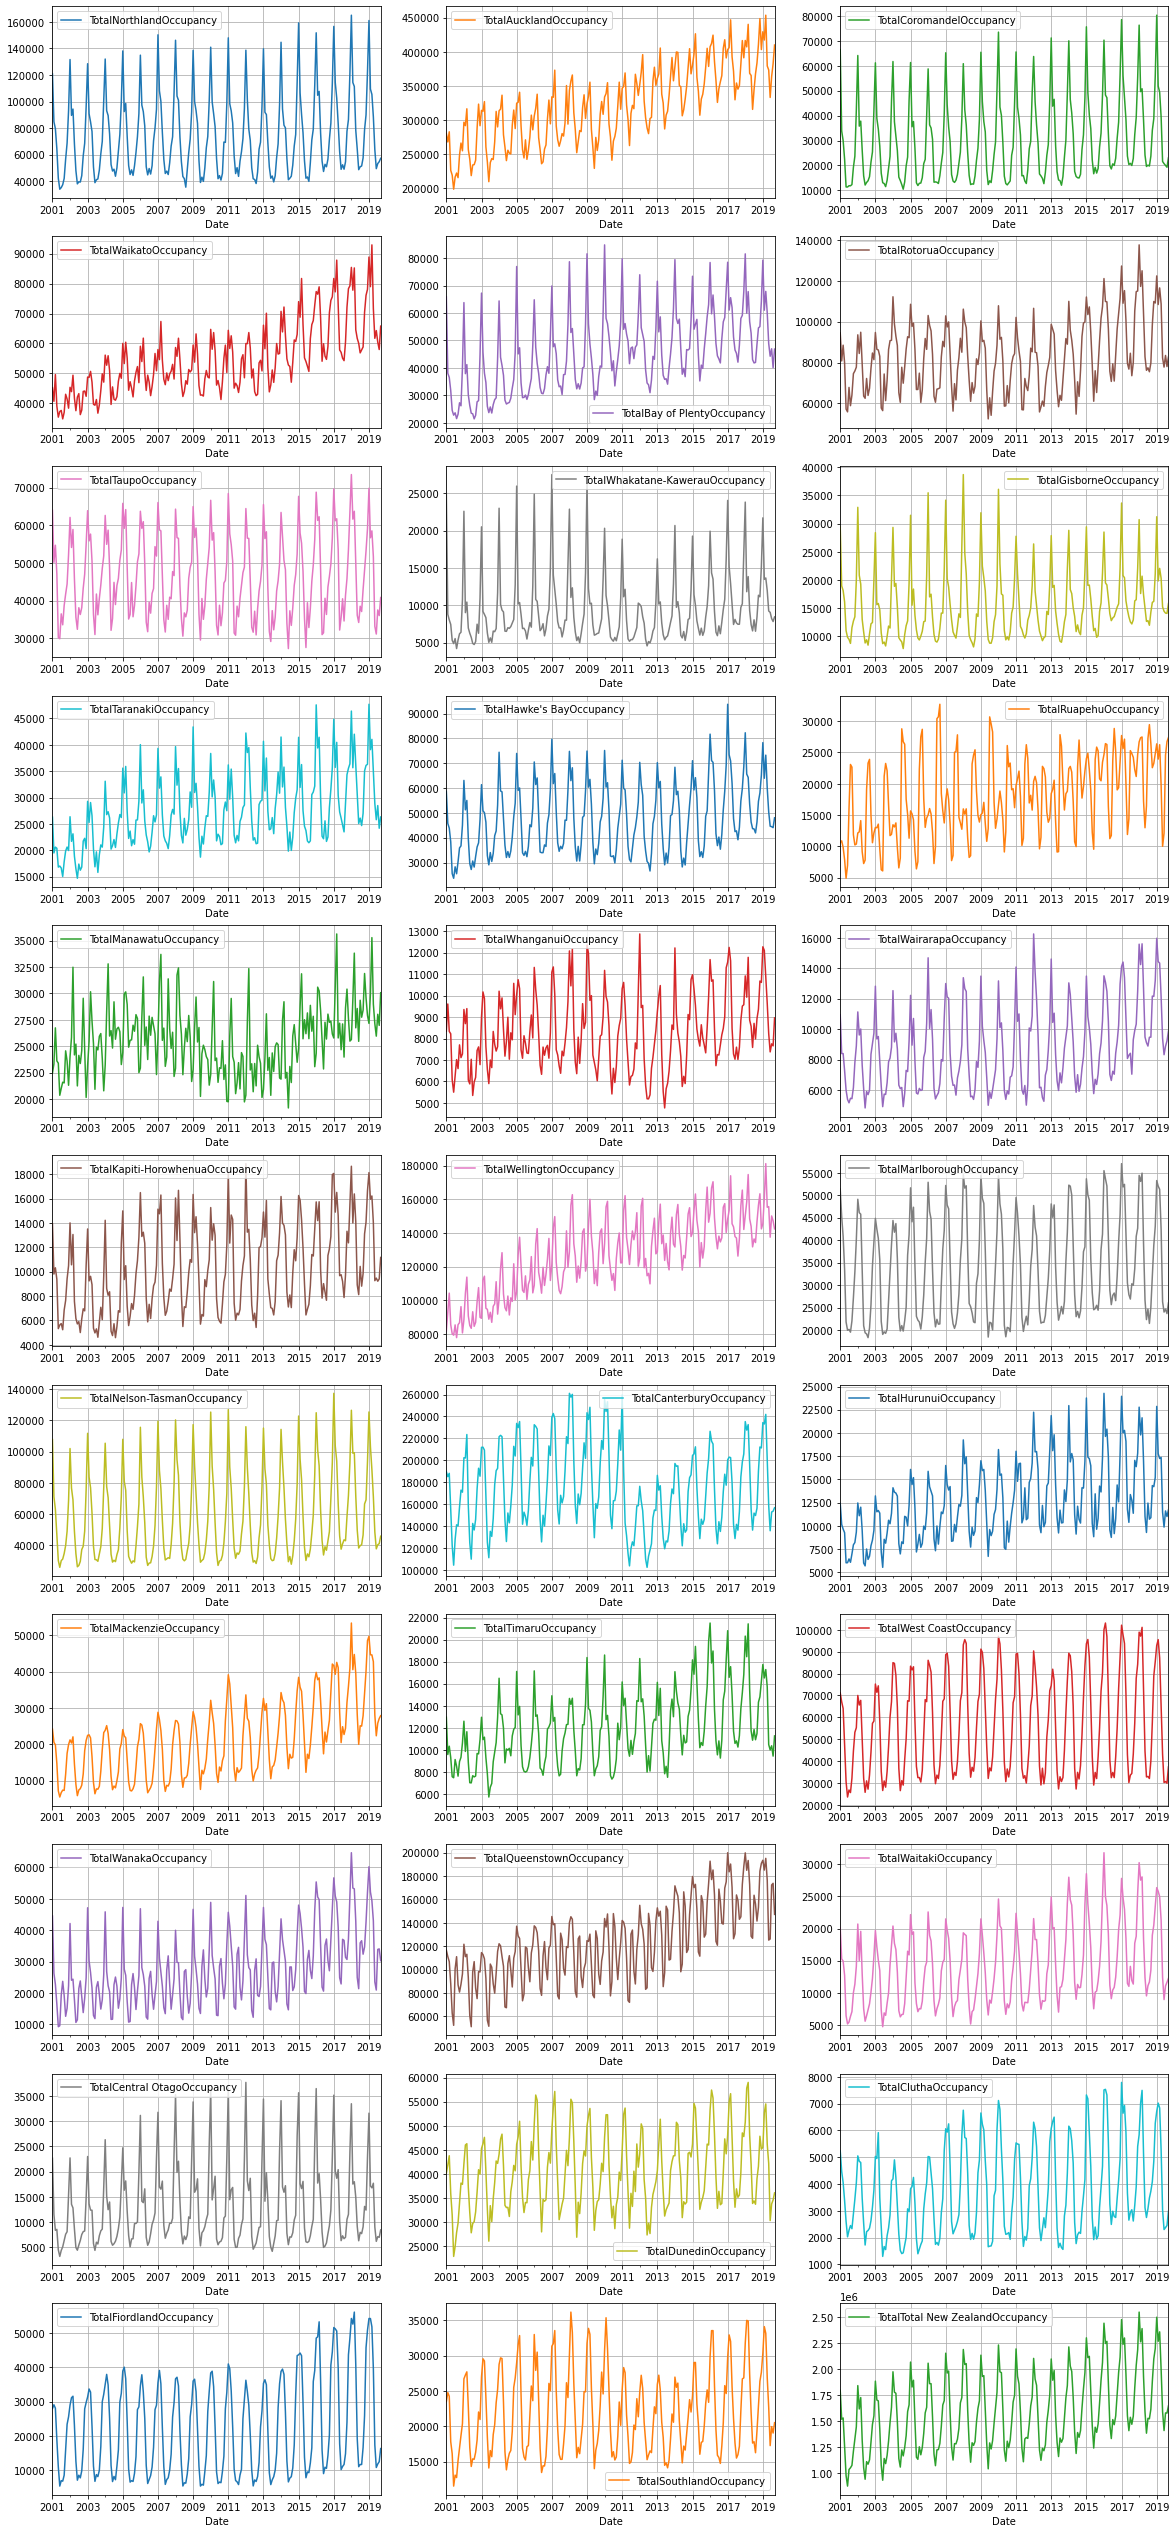

In [34]:
#We will start with our Total occupancy for ALL accomodation types

total_accomodation = accomodation.filter(regex=('^Total')).filter(regex=('Occupancy$')).columns
accomodation[total_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(total_accomodation)/3)+1, 3), figsize = (20,50));

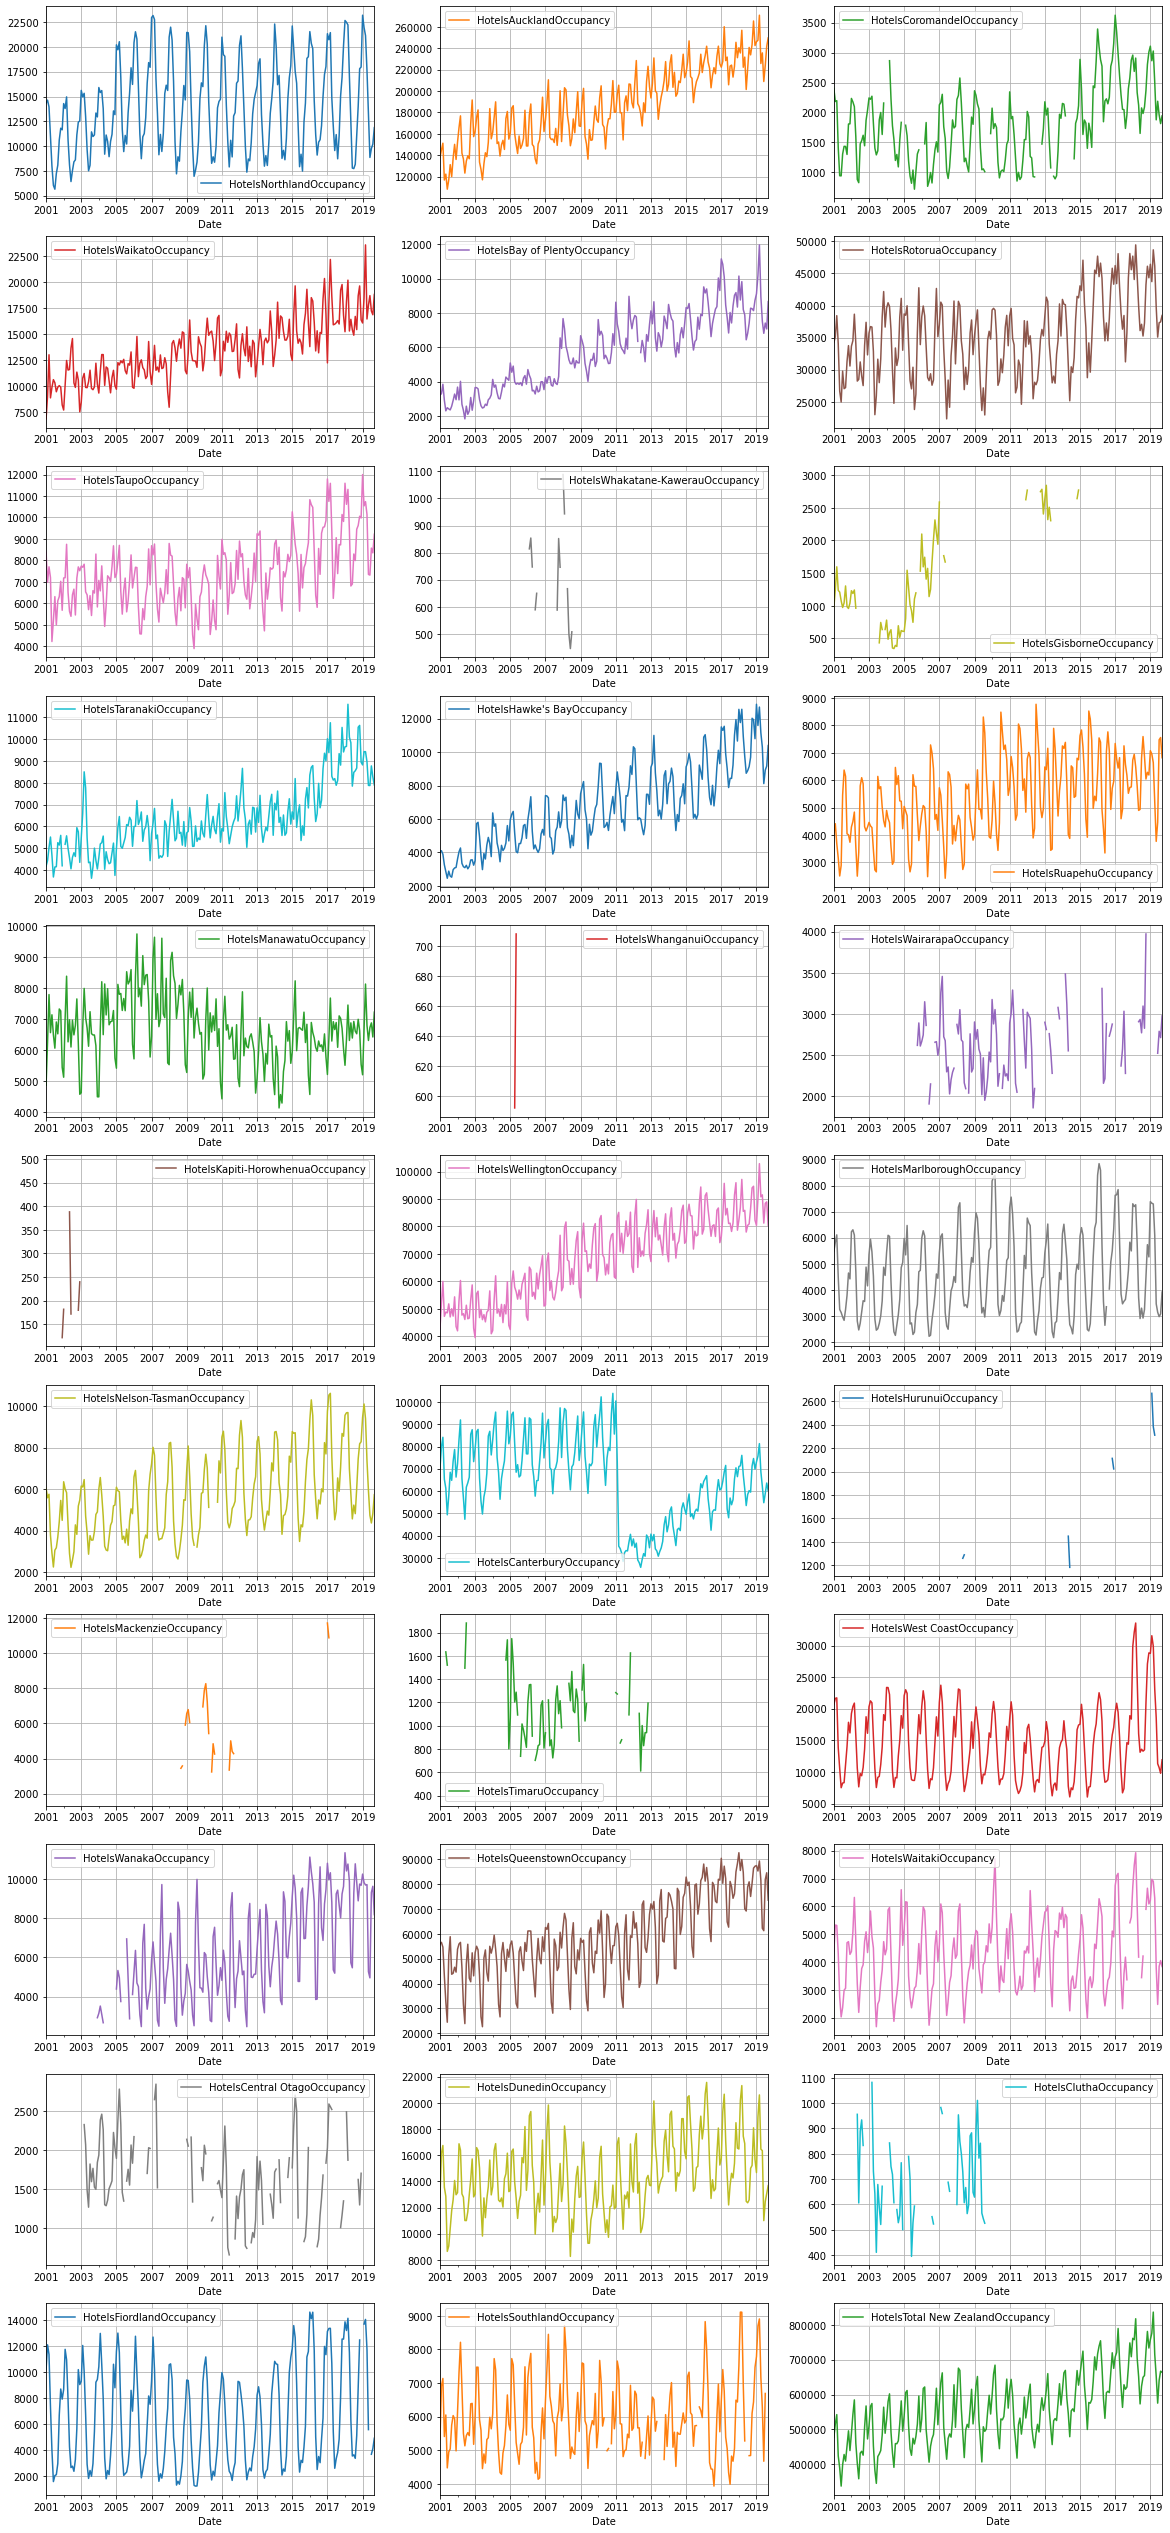

In [35]:
#lets look at hotels
accomodation[hotel_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(hotel_accomodation)/3)+1, 3), figsize = (20,50));

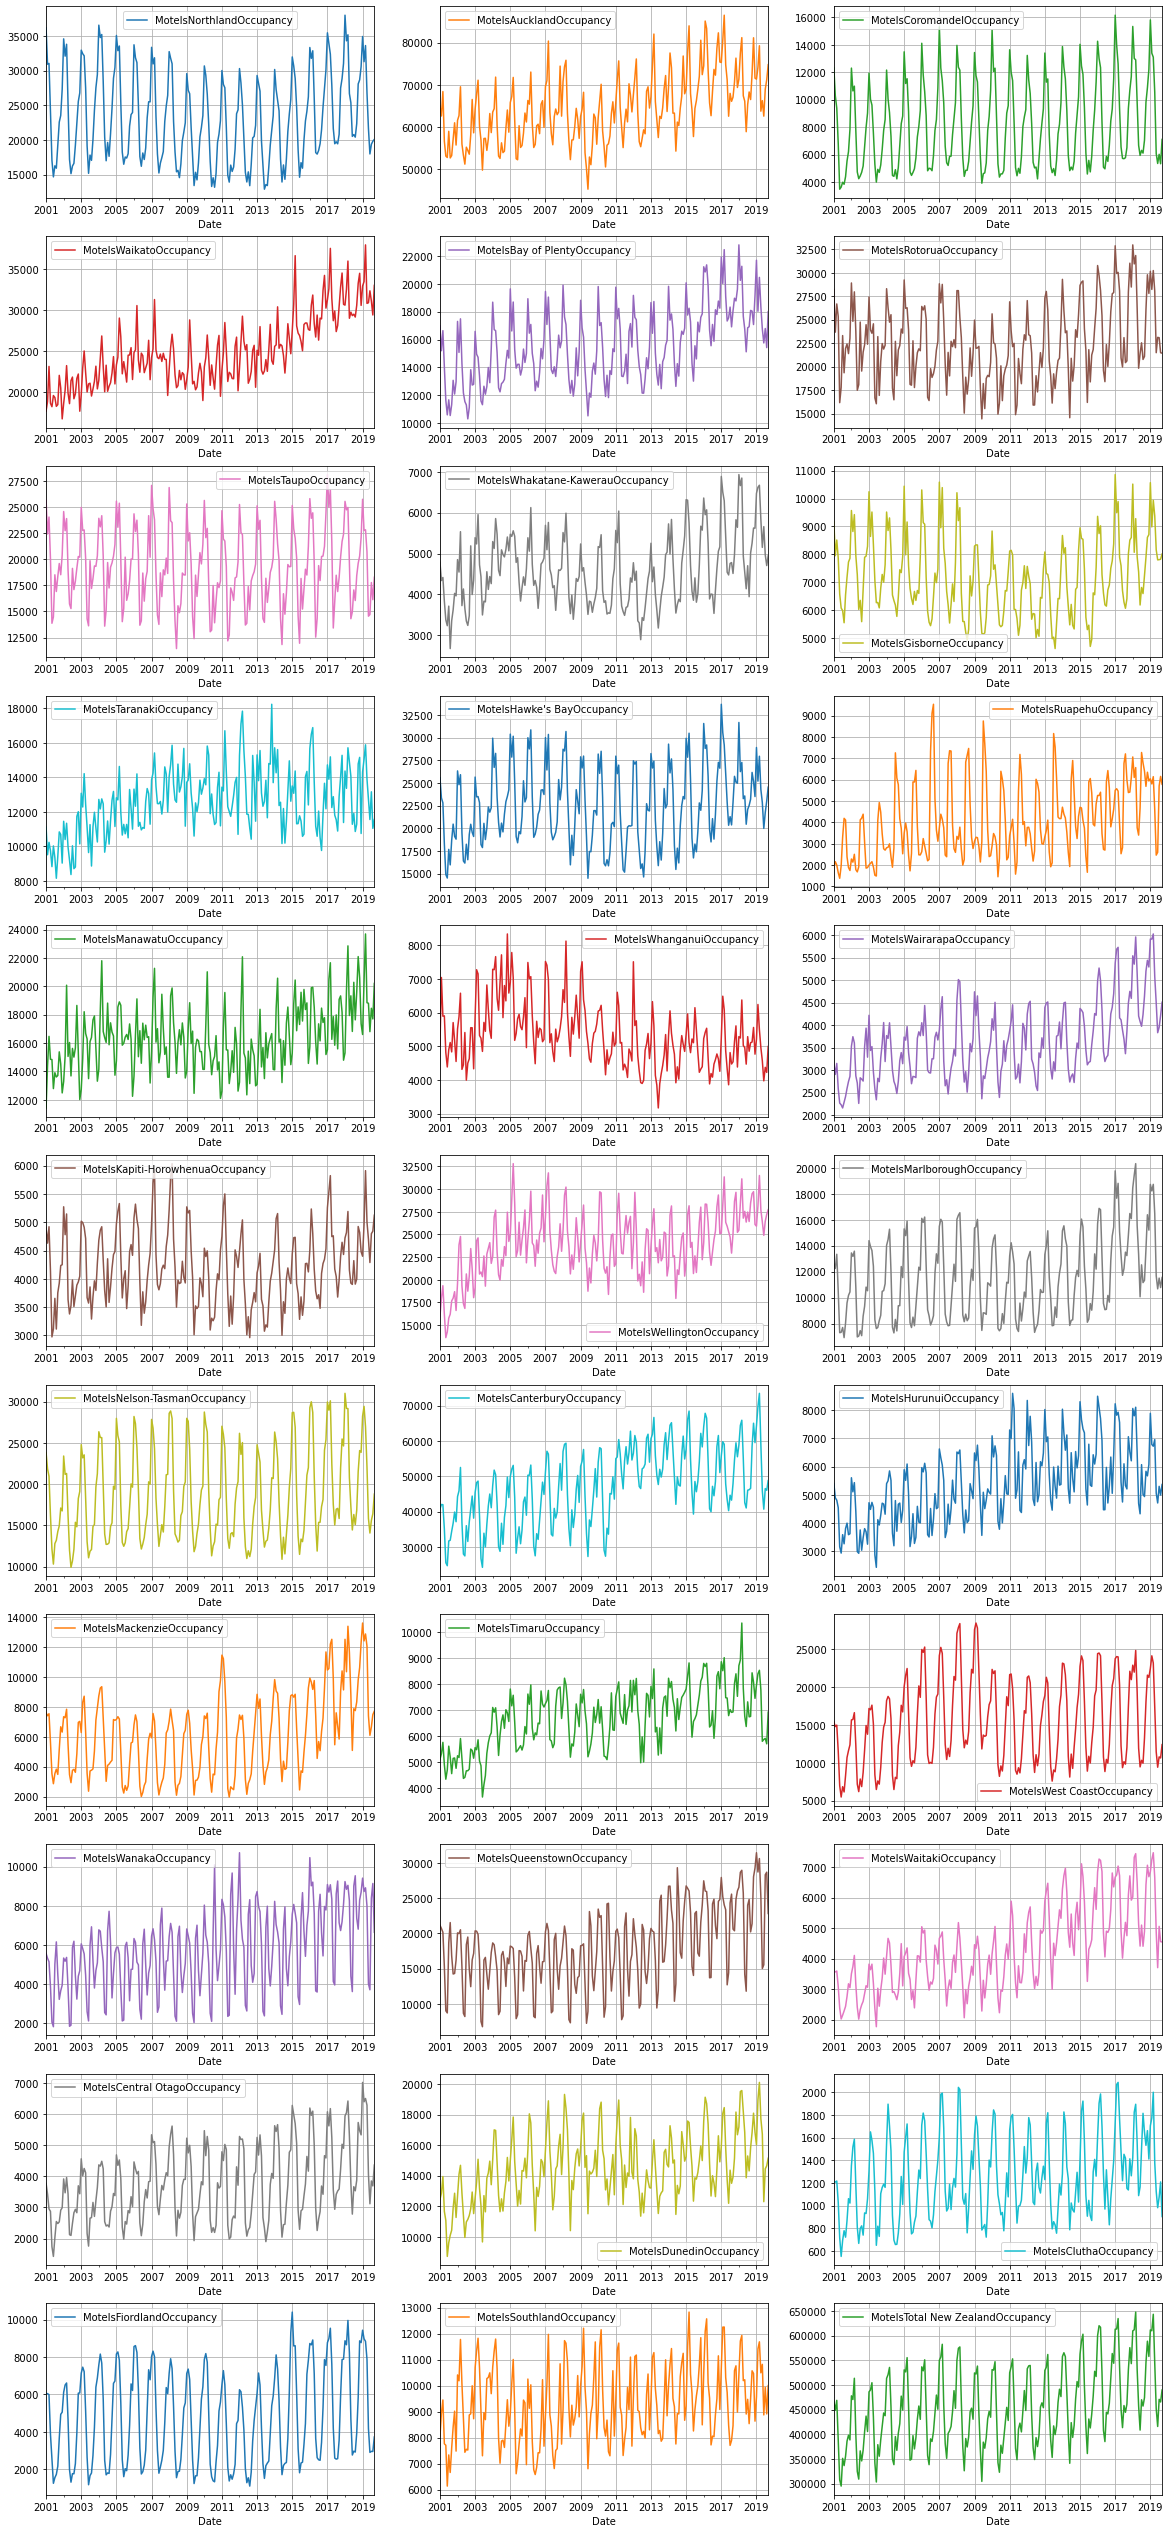

In [36]:
#Lets look at motels
motel_accomodation = accomodation.filter(regex=('^Motel')).filter(regex=('Occupancy$')).columns

accomodation[motel_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(motel_accomodation)/3)+1, 3), figsize = (20,50));

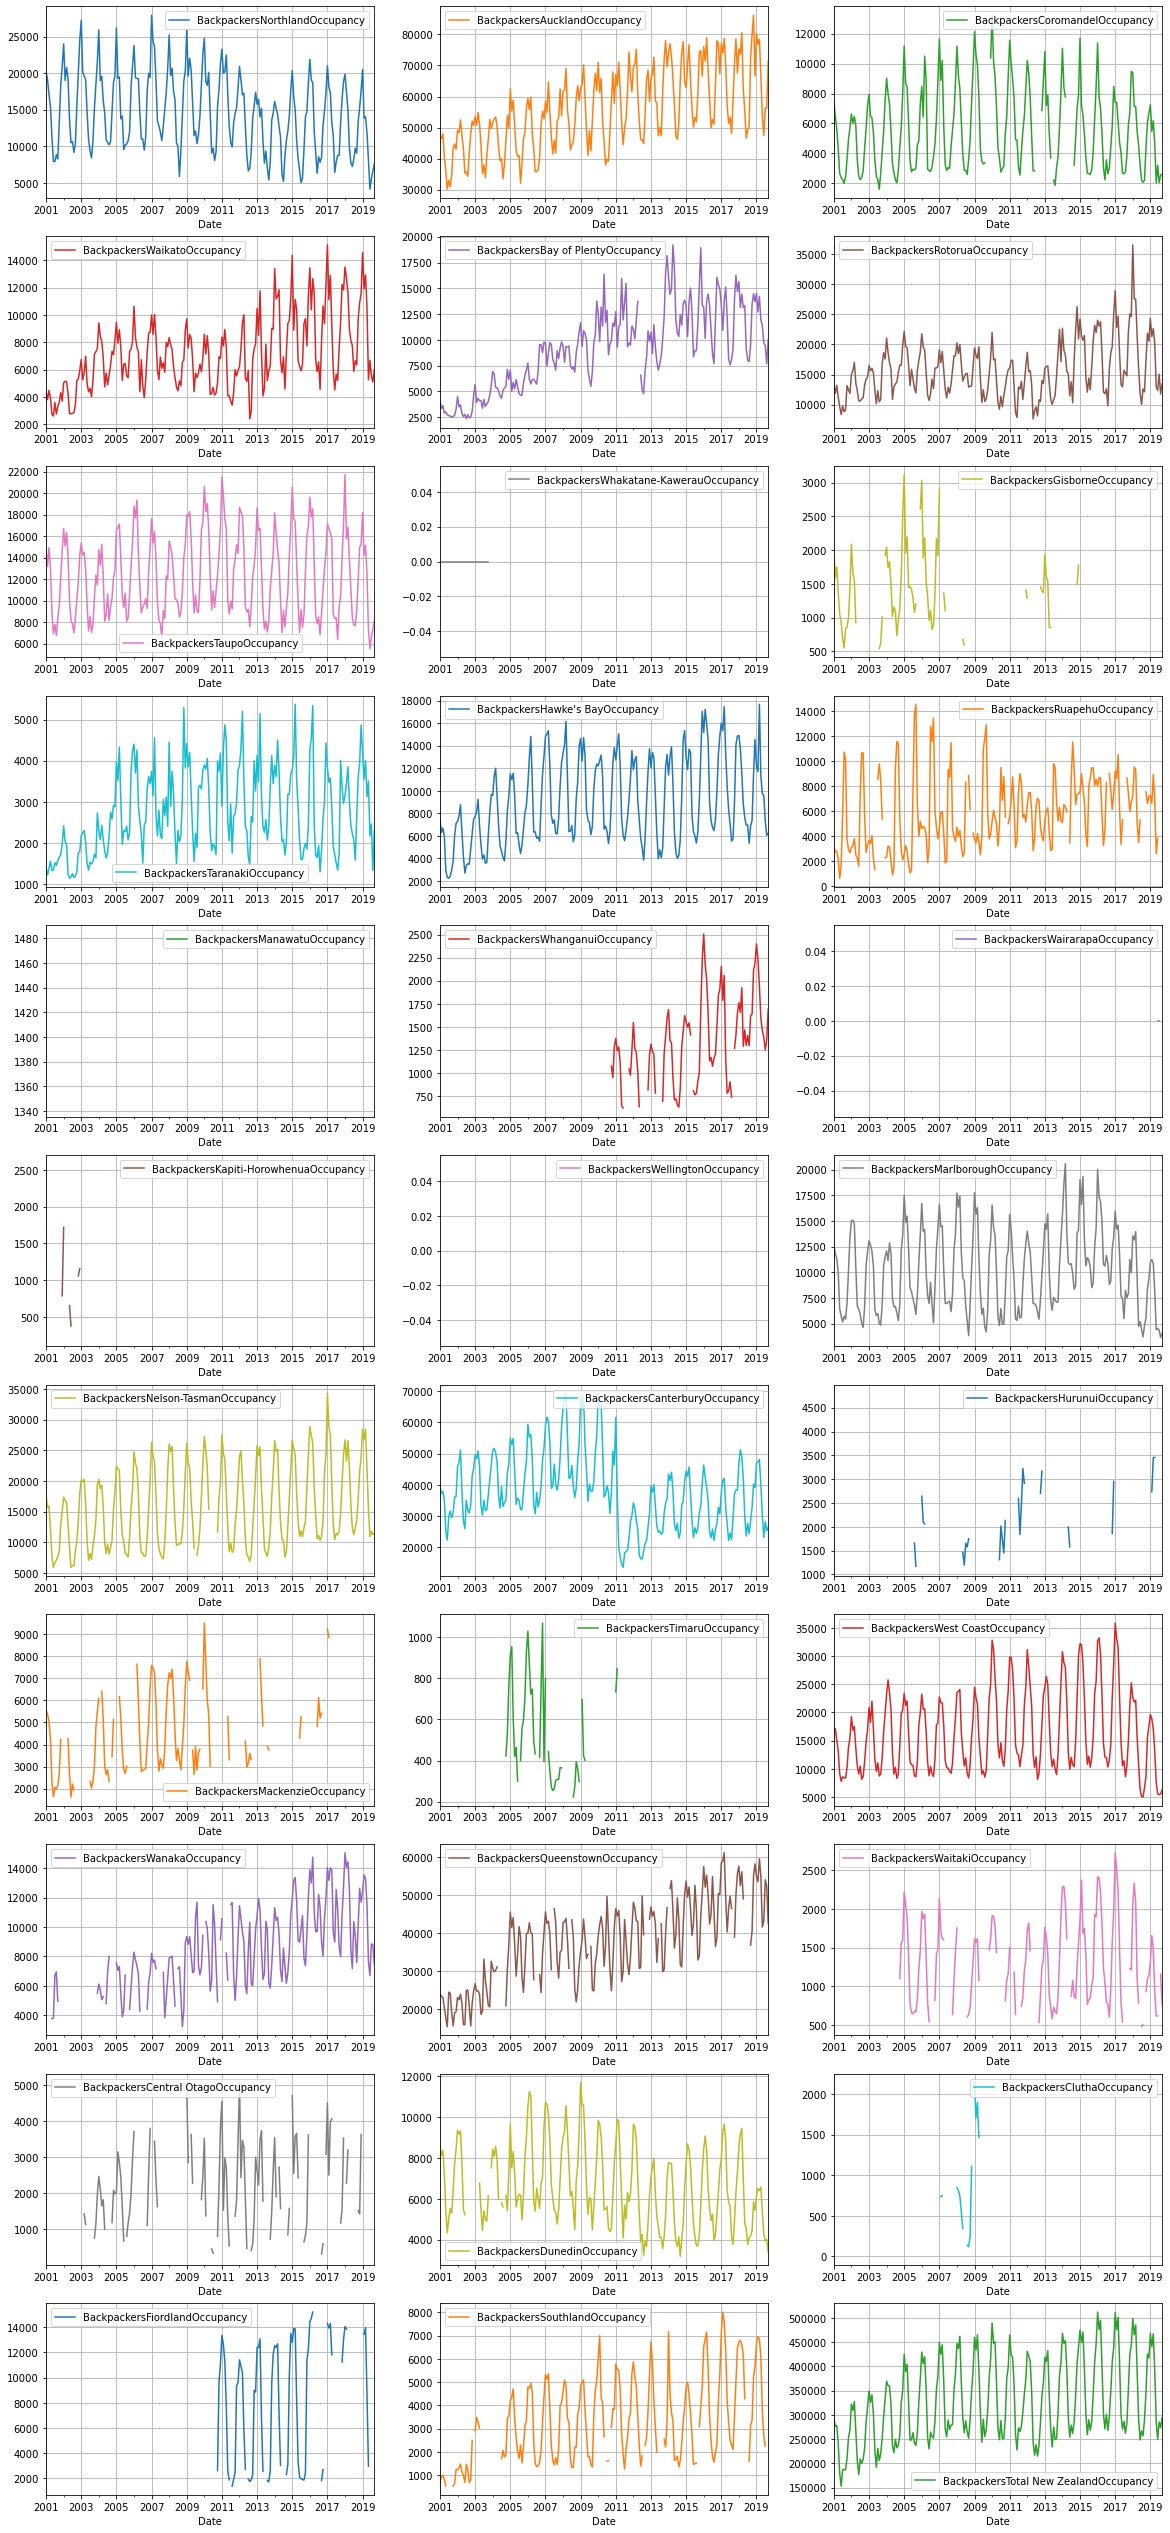

In [37]:
#Lets look at backpackers
backpacker_accomodation = accomodation.filter(regex=('^Backpackers')).filter(regex=('Occupancy$')).columns

accomodation[backpacker_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(backpacker_accomodation)/3)+1, 3), figsize = (20,50));

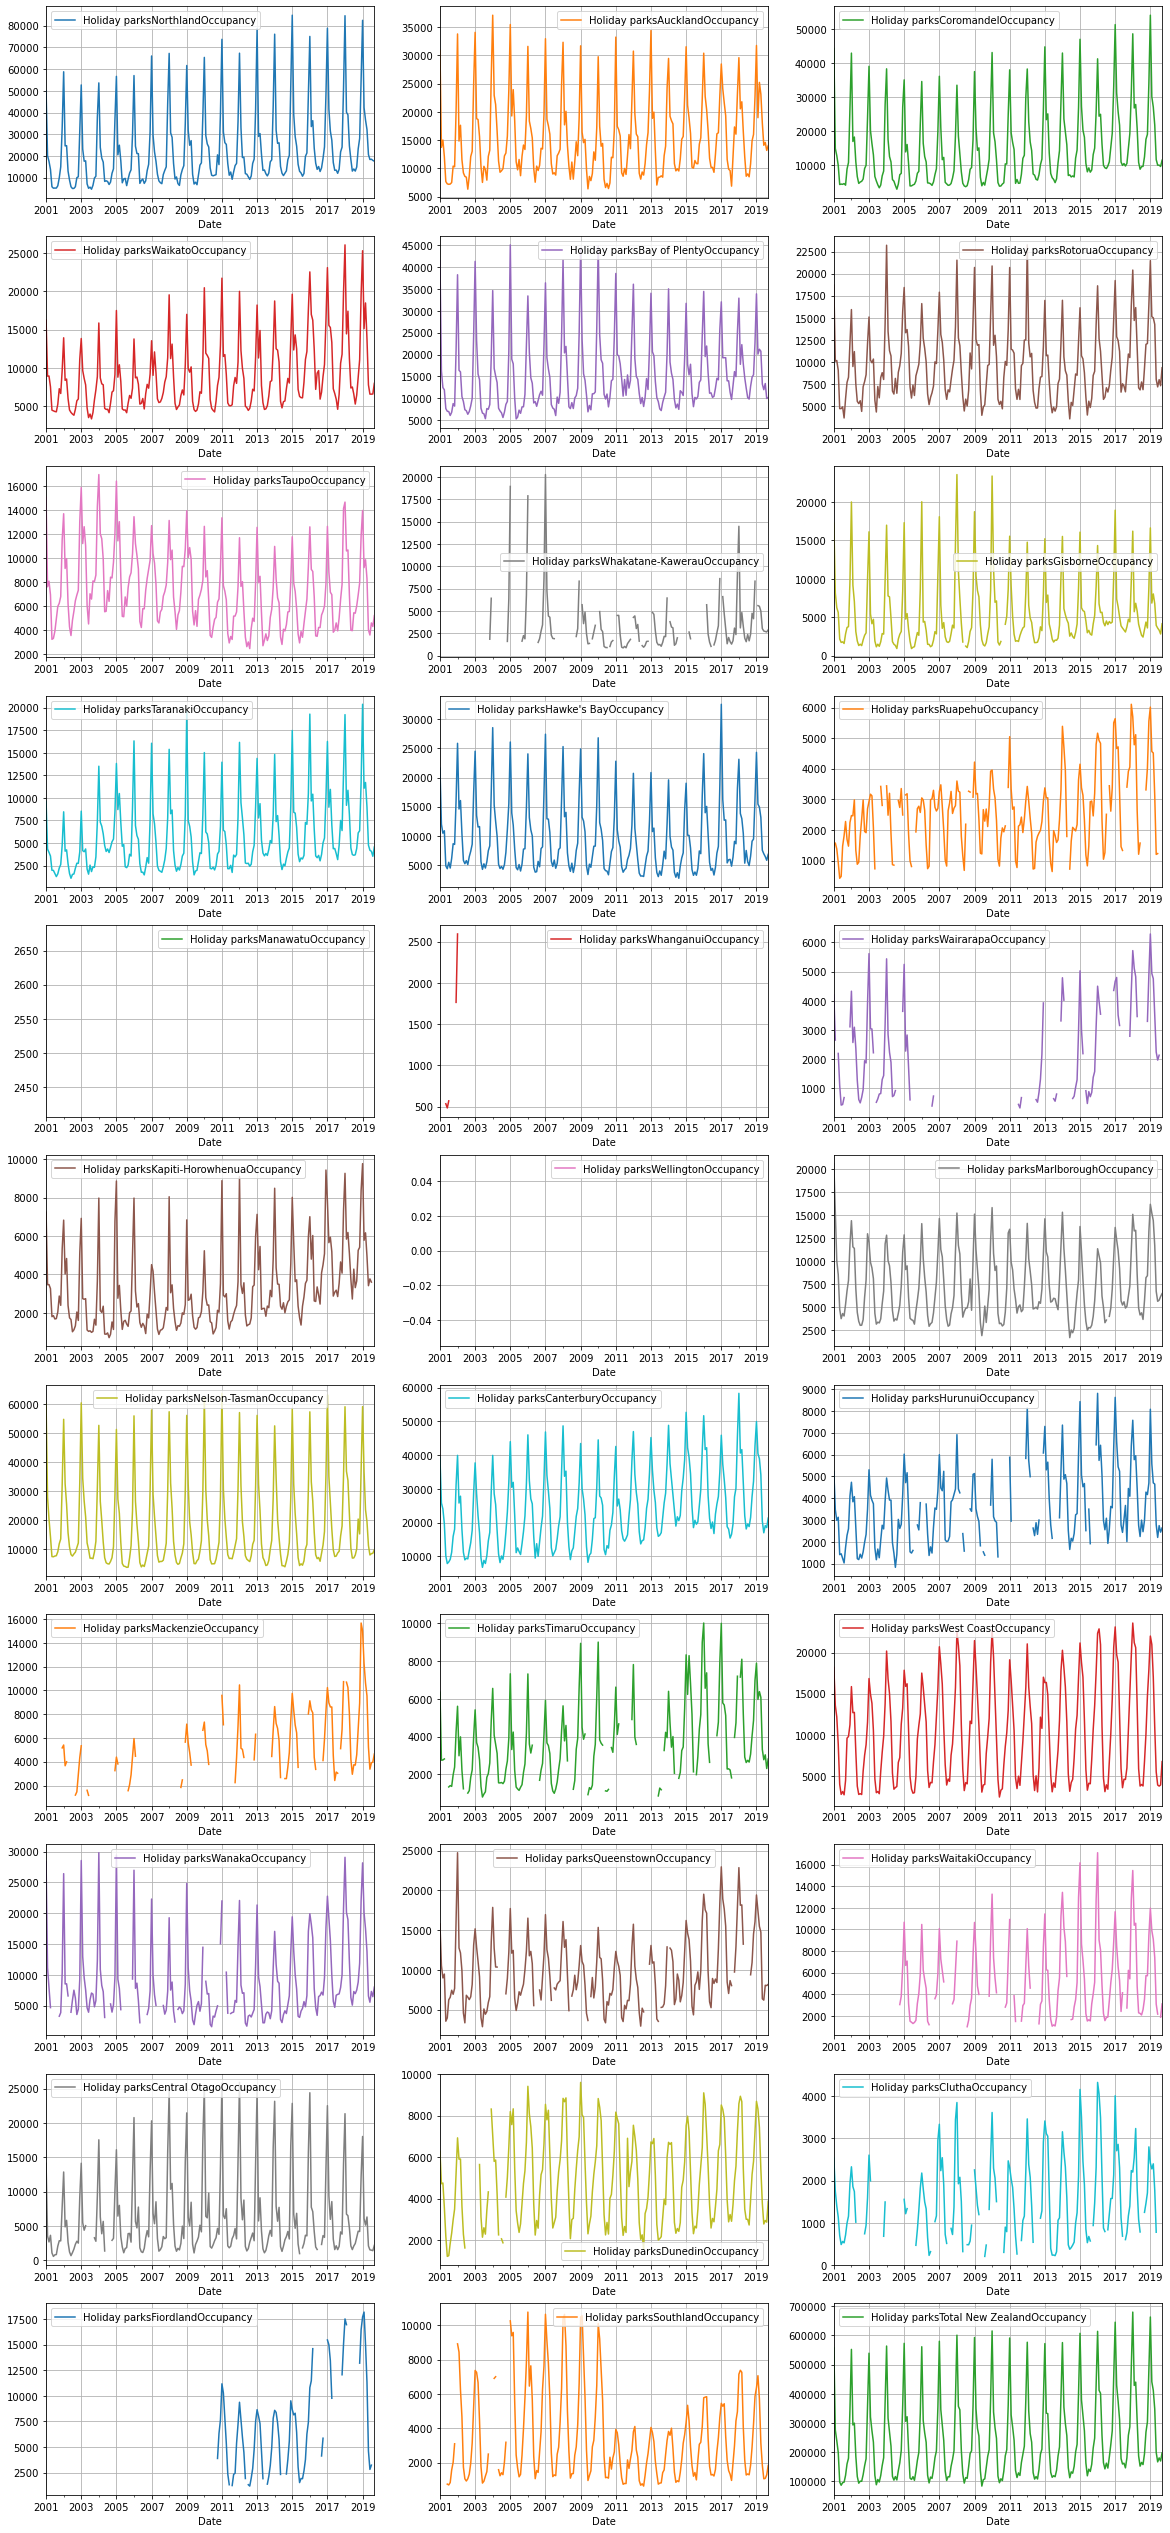

In [38]:
#Lets look at Holiday Parks
holidaypark_accomodation = accomodation.filter(regex=('^Holiday')).filter(regex=('Occupancy$')).columns

accomodation[holidaypark_accomodation].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(holidaypark_accomodation)/3)+1, 3), figsize = (20,50));

## 2.2 Thoughts on the Accomodation Dataset

I want to explore the initial insights I see from the graphing of each of these data sets. Some of these data sets are definitely too inconsistent to be used as for forecasting but with some of these data sets we may be able to impute missing data.

### Total

The total data is very consistent. There seems to be no issues with missing data in these sets. The trends are definitely seasonal with a few perhaps even having an upward trend. We will definitely need to preprocess this information and remove the seasonal efects before using it for forecasting. 

### Hotels

The hotel data is surprisingly sparse. There are many regions which are missing data. I would not be very confident using many region's data for forecasting. I think that the existing hotel data that is existing would be interesting to look at but not for the usage of forecasting. 

### Motels

Motel data was very well documented. Over the course of the data, there seems to be no missing data for motels. I think that we begin to see some trends of increasing occupancy with obvious seasonal effects. I think that exploring motel forecasting could be useful for helping this specific accomodation prepare for an increasing influx of visitors. Motels may be the most impacted by a growing visitor population and gives us the best opportunity for making targeted forecasting.


### Backpackers

For some regions, backpacking is very consistent. With some regions missing backpacking data entirely. I think that there is little reason to really look into backpacking forecasting as these are going to be in the wilderness. The usual accomodations will be in the nature. The spaces are naturally limited and controlled by a wilderness authority. There is no way to really easily expand capacity but the occupancy is limited by nature. While seasonal, there seems to have been limited growth in this region.

### Holiday Parks

Holiday parks that have data have very clear season effects. True to their name, these parks are generally most occupied during the holiday season. While many regions have sparse data there are still many regions which are able to give us good data across the timespan of the data. Still, there is little growh in this particular accomodation and historical data can probably be used to make some confident forecasting for the future as these parks open back up. 

### Overall Thoughts

I think that I want to stick to using either total forecasting for overall knowledge across the industry to understand trends. I definitely want to dig deeper into the motels accomodations so that we can get a better understanding for this particular accomodation and help them out with their forecasting a bit more. 

I definitely think that focusing on certain regions like Auckland, Rotorua, and Queenstown could be useful as these are huge tourist areas. I will continue to dig into other regions and see which regions have the most complete data that maybe we can use for further exploration and analysis. 

The total dataset is very useful for that last part and I think that we can use that for forecasting regions that may begin to see the highest levels of tourism. WE can combine this with the next dataset which is the Visitor dataset and use that to help corroborate with our accomodation dataset.

## 3.1 Exploring the Arrivals Dataset.

Now that we've looked at our accomodations, lets explore our arrival numbers in a similar manner. If we can forecast this dataset alongside the accomodations data we can use both to prepare multiple industries at once. Knowing how many people may be incoming to New Zealand we can prepare multiple industries such as food service, accomodation, and even airport security.

In [39]:
arrivals.head()

BusinessAuckland   BusinessChristchurch   BusinessDunedin   \
Date                                                                     
1978-04-01             3428.0                  468.0               0.0   
1978-05-01             2264.0                  524.0               0.0   
1978-06-01             2136.0                  280.0               0.0   
1978-07-01             2156.0                  324.0               0.0   
1978-08-01             2304.0                  536.0               0.0   

            BusinessHamilton   BusinessPalmerston North   BusinessRotorua   \
Date                                                                         
1978-04-01                0.0                        0.0               0.0   
1978-05-01                0.0                        0.0               0.0   
1978-06-01                0.0                        0.0               0.0   
1978-07-01                0.0                        0.0               0.0   
1978-08-01                0.0                        0.0               0.0   

            BusinessWellington   BusinessQueenstown   \
Date                                                   
1978-04-01                492.0                  0.0   
1978-05-01                428.0                  0.0   
1978-06-01                384.0                  0.0   
1978-07-01                380.0                  0.0   
1978-08-01                496.0                  0.0   

            BusinessTOTAL NEW ZEALAND PORTS  Holiday/VacationAuckland   ...  \
Date                                                                    ...   
1978-04-01                           4408.0                    10476.0  ...   
1978-05-01                           3236.0                     7168.0  ...   
1978-06-01                           2880.0                     4640.0  ...   
1978-07-01                           2964.0                     6184.0  ...   
1978-08-01                           3416.0                     8236.0  ...   

            Visit Friends/RelativesTOTAL NEW ZEALAND PORTS  \
Date                                                         
1978-04-01                                          3324.0   
1978-05-01                                          3568.0   
1978-06-01                                          2600.0   
1978-07-01                                          3144.0   
1978-08-01                                          4204.0   

            TOTAL ALL TRAVEL PURPOSESAuckland   \
Date                                             
1978-04-01                             19856.0   
1978-05-01                             15428.0   
1978-06-01                             11416.0   
1978-07-01                             14072.0   
1978-08-01                             17960.0   

            TOTAL ALL TRAVEL PURPOSESChristchurch   \
Date                                                 
1978-04-01                                  6240.0   
1978-05-01                                  5240.0   
1978-06-01                                  2708.0   
1978-07-01                                  4900.0   
1978-08-01                                  7900.0   

            TOTAL ALL TRAVEL PURPOSESDunedin   \
Date                                            
1978-04-01                                0.0   
1978-05-01                                0.0   
1978-06-01                                0.0   
1978-07-01                                0.0   
1978-08-01                                0.0   

            TOTAL ALL TRAVEL PURPOSESHamilton   \
Date                                             
1978-04-01                                 0.0   
1978-05-01                                 0.0   
1978-06-01                                 0.0   
1978-07-01                                 0.0   
1978-08-01                                 0.0   

            TOTAL ALL TRAVEL PURPOSESPalmerston North   \
Date                                                     
1978-04-01             

In [40]:
#lets examine the reasons for entry for each location
arrivals.columns

#looks like we have business, holiday/vacation, visit friends, and total travel!

Index(['BusinessAuckland ', 'BusinessChristchurch ', 'BusinessDunedin ',
       'BusinessHamilton ', 'BusinessPalmerston North ', 'BusinessRotorua ',
       'BusinessWellington ', 'BusinessQueenstown ',
       'BusinessTOTAL NEW ZEALAND PORTS', 'Holiday/VacationAuckland ',
       'Holiday/VacationChristchurch ', 'Holiday/VacationDunedin ',
       'Holiday/VacationHamilton ', 'Holiday/VacationPalmerston North ',
       'Holiday/VacationRotorua ', 'Holiday/VacationWellington ',
       'Holiday/VacationQueenstown ',
       'Holiday/VacationTOTAL NEW ZEALAND PORTS',
       'Visit Friends/RelativesAuckland ',
       'Visit Friends/RelativesChristchurch ',
       'Visit Friends/RelativesDunedin ', 'Visit Friends/RelativesHamilton ',
       'Visit Friends/RelativesPalmerston North ',
       'Visit Friends/RelativesRotorua ', 'Visit Friends/RelativesWellington ',
       'Visit Friends/RelativesQueenstown ',
       'Visit Friends/RelativesTOTAL NEW ZEALAND PORTS',
       'TOTAL ALL TRAVEL PURPO

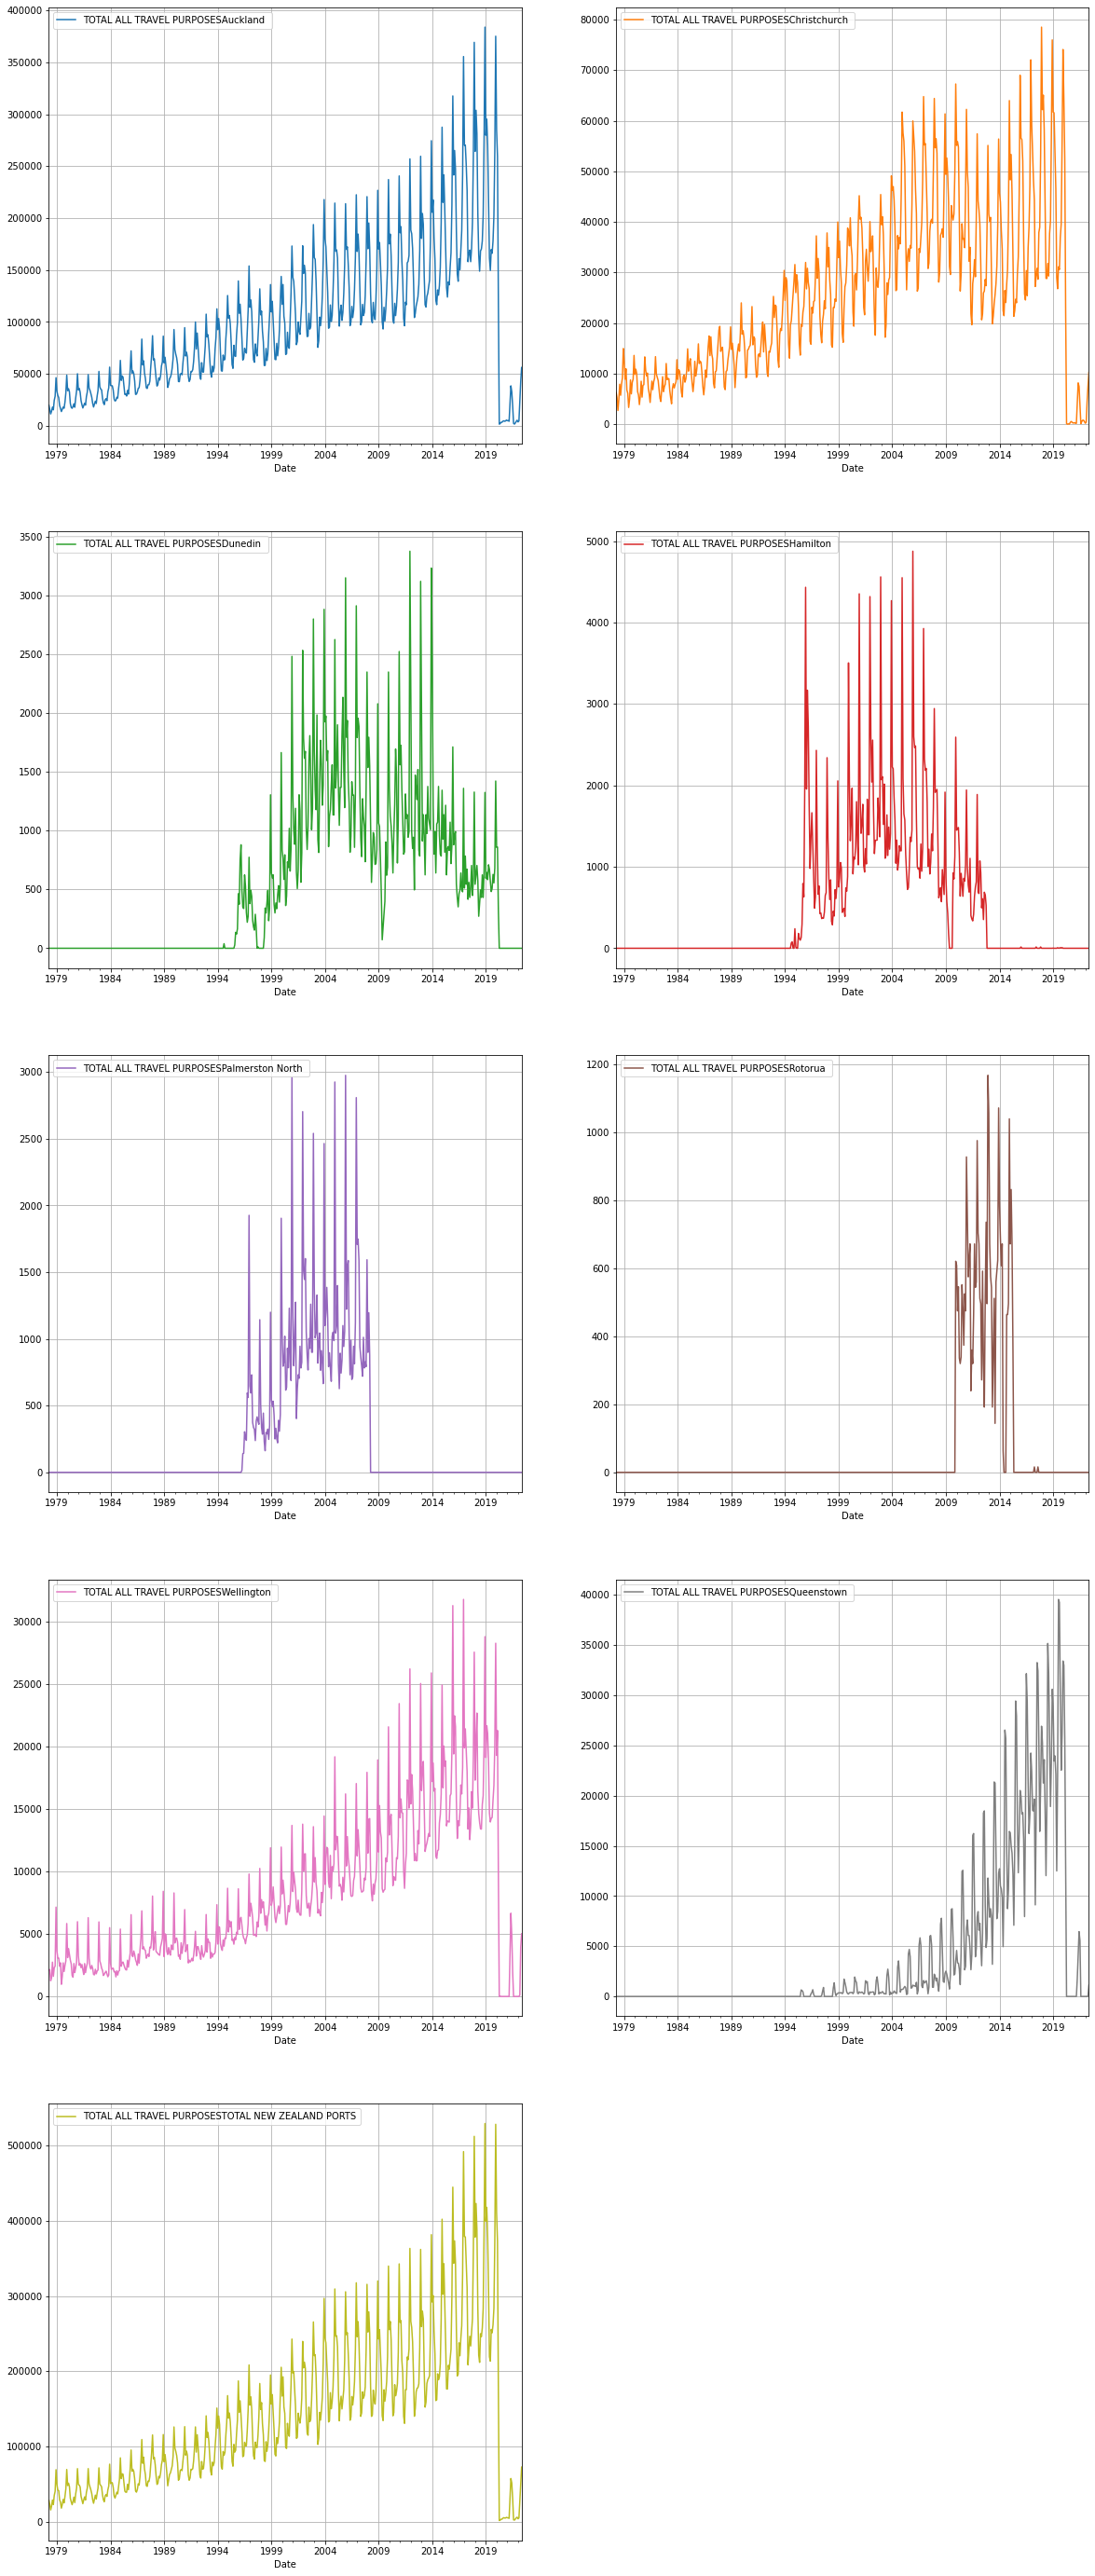

In [41]:
#Lets look at TOTAL ENTRY!
total_entry = arrivals.filter(regex=('^TOTAL')).columns

arrivals[total_entry].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(total_entry)/2)+1, 2), figsize = (20,50));

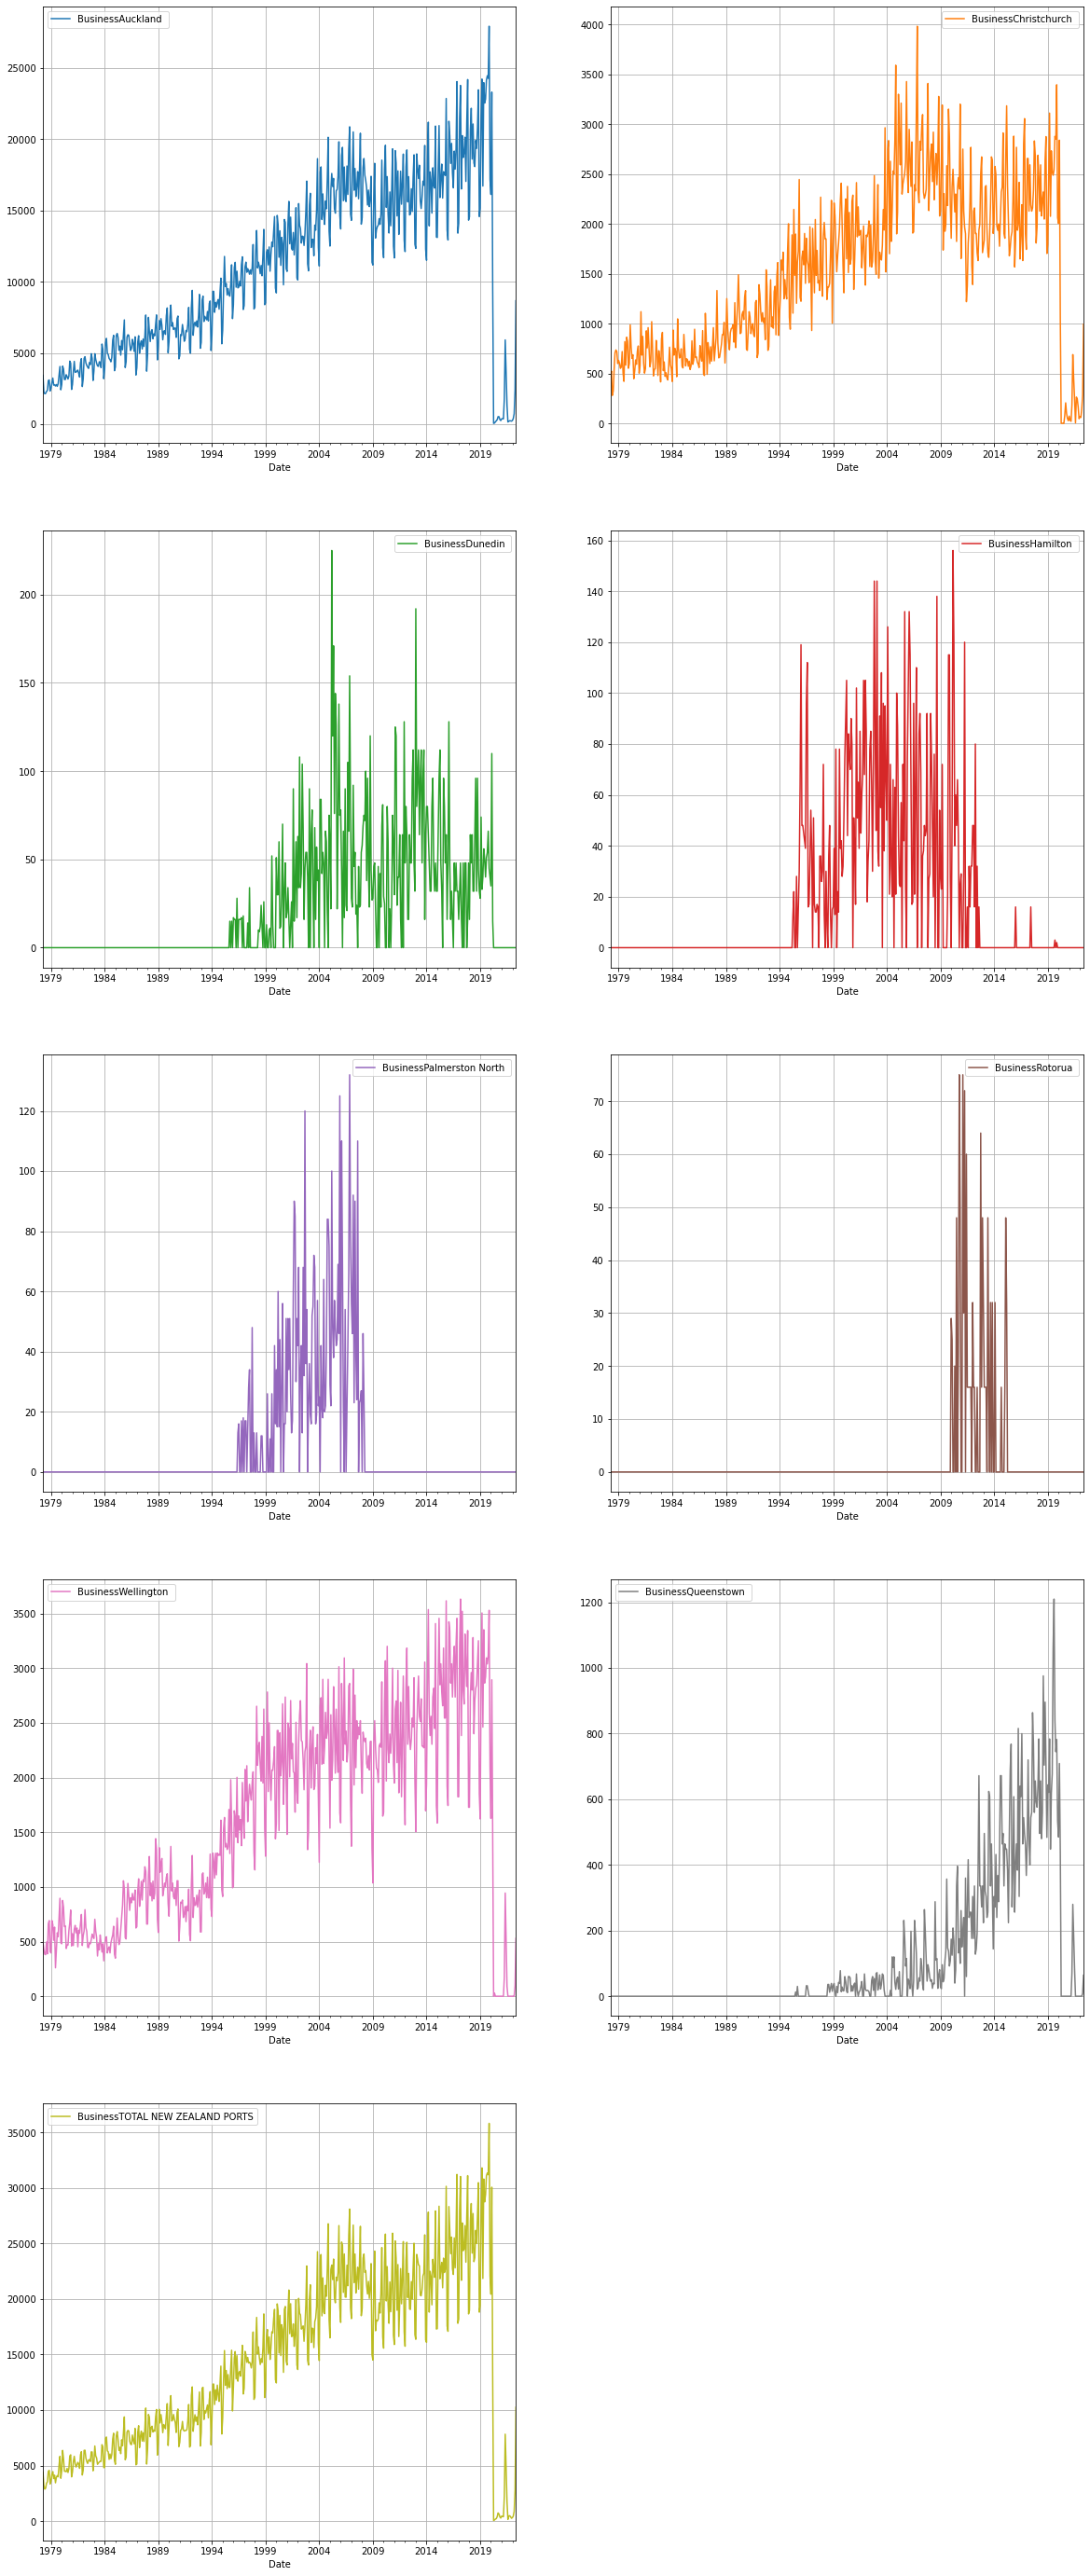

In [42]:
#Lets look at business
business_entry = arrivals.filter(regex=('^Business')).columns

arrivals[business_entry].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(business_entry)/2)+1, 2), figsize = (20,50));

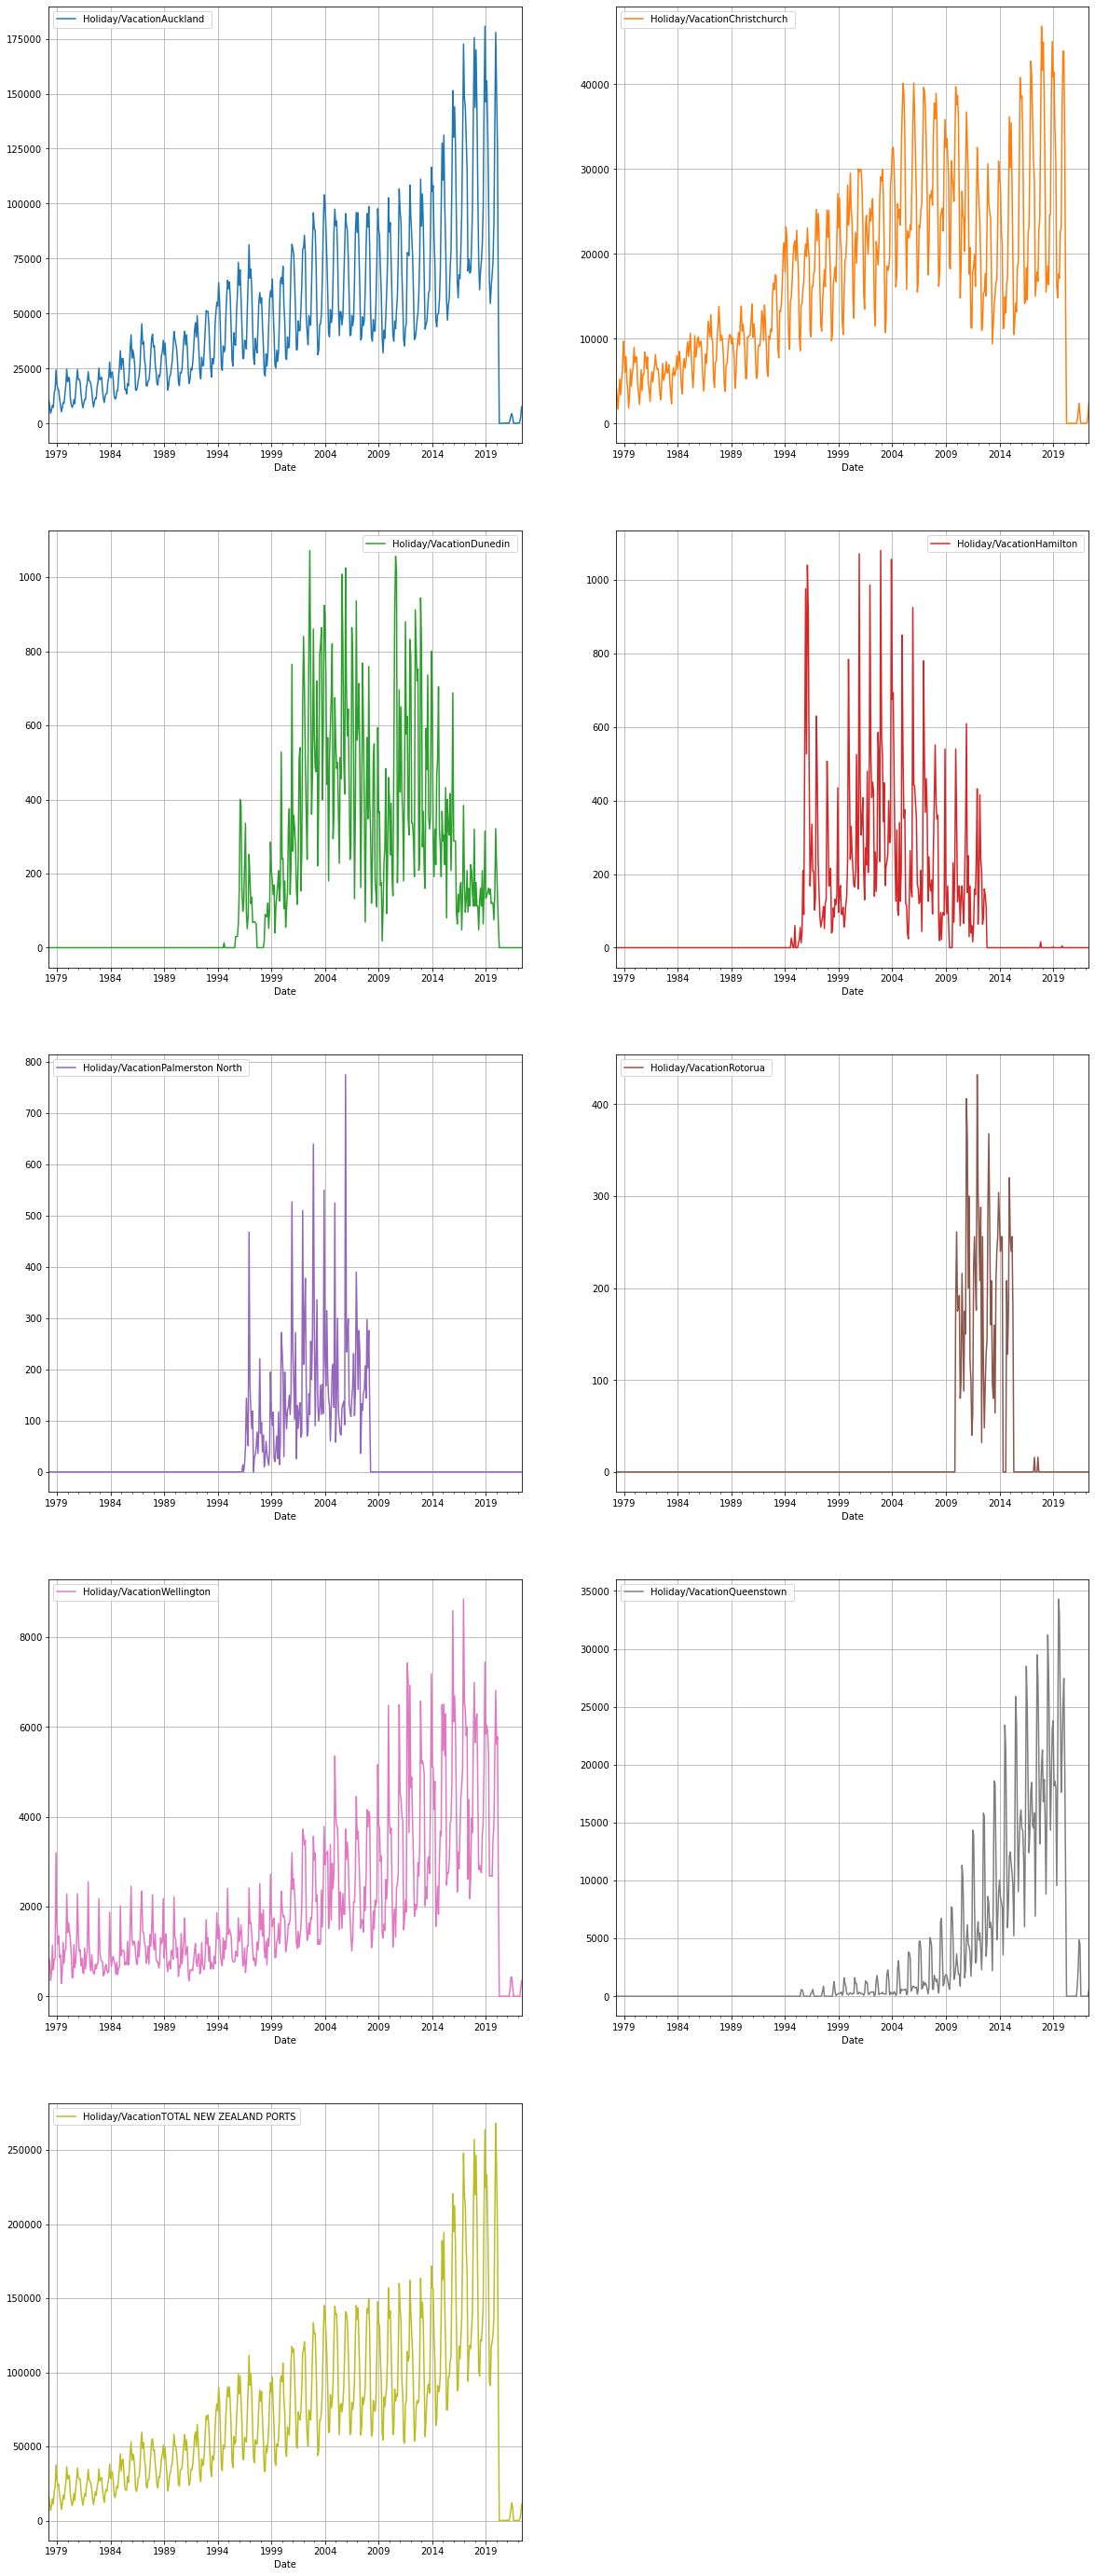

In [43]:
#Lets look at holiday
holiday_entry = arrivals.filter(regex=('^Holiday')).columns

arrivals[holiday_entry].plot(subplots = True, grid = True, sharex=False, \
                                      layout = (int(len(holiday_entry)/2)+1, 2), figsize = (20,50));

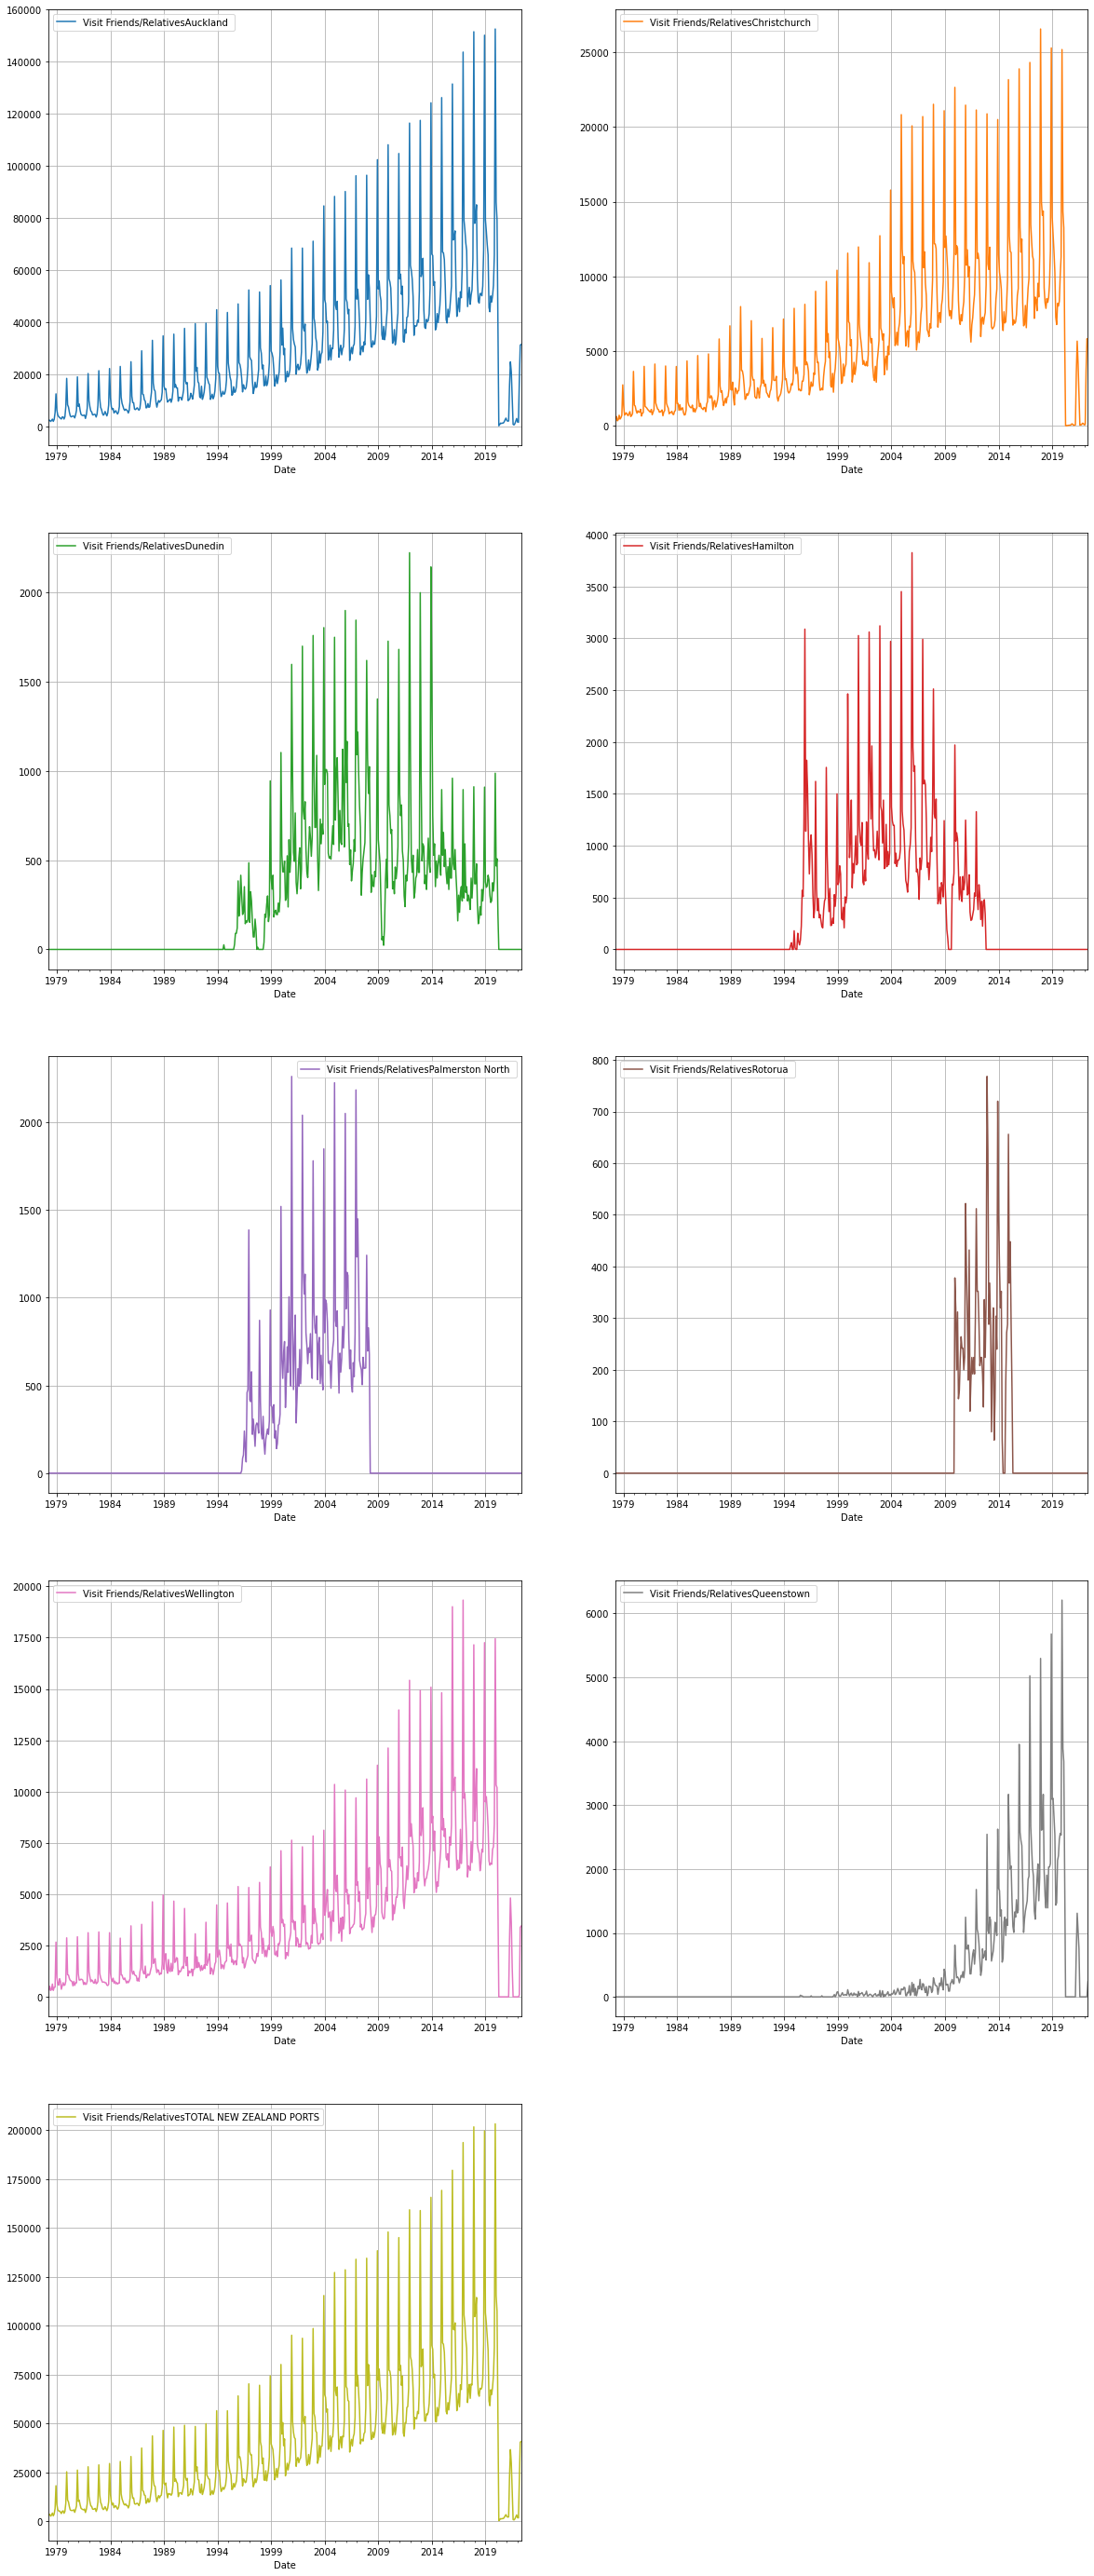

In [44]:
#Lets look at visiting friends
visit_entry = arrivals.filter(regex=('^Visit')).columns

arrivals[visit_entry].plot(subplots = True, grid = True, sharex=False, \
                                          layout = (int(len(visit_entry)/2)+1, 2), figsize = (20,50));

## 3.2 Thoughts on the Tourism Data

Here are the initial thoughts for the tourism data to each of these ports. 

### Total

We see a pretty consistent trend of growth overall. There is also definitely a seasonal trend to the data. We will have to preprocess for the seasonal and trends in order to analyse this data. We do see the sudden plummet due to the COVID-19 pandemic and that will be our challenge. To predict our growth forecast back to our normal levels.

### Business

Business travel seems to be pretty consistent throughout the year with a definite growing trend. This makes sense as business is constant with seasons of highs and lows but with less overall impact on business travel. We definitely will need to adapt for this growth trend up until the COVID-19 pandemic.

### Holiday

As expected of holiday travel we see a definite seasonal effect. However, we see slightly less of a growth trend impacting the data than with other types of travel. This is surprising since we expect holiday travel to New Zealand to continue to grow but the growth trends seem minimal compared to the effect of seasons.

### Visiting Friends

Visiting friends seems to have both a minimal growth trend but a highly seasonal effect. This mirrors the holiday data and maybe we can use similar models for forecasting both because of it.

### Overall Thoughts

Overall, the travel data seems to follow similar trends. This means that maybe focusing our efforts on forecasting "total" and "business" travel would be in our best interest. The ports of `Dunedin`, `Hamilton`, `Palmerton North`, `Rotorua`, and `Queenstown` all start later as these ports open up later. It may be a bit of a challenge to accurately forecast these ports with the limited data but our greatest challenging is forecasting post-pandemic. The goal of our project will be to see if we can project what travel will be like as ports in New Zealand open and what the rate of tourism will be like as we return to international travel.

## 4.0 Final Thoughts and Plans 

As we look at this data, I definitely have an idea of how I want to approach the forecasting.

I want to focus on regional growth trends for the accomodation and ports of entry. I think understanding how these two trends corrolate will be interesting. 

Moving forward, I definitely will need to pre-process out all seasonal data and trend data for multiple data sets. Instead of forecasting for every timeseries, I think creating a model for a few select models will be key. For the accomodation and the tourism data I want to focus on regions that are matched as well as datasets with more complete data. These datasets include the regions of `Auckland`, `Queenstown`, `Rotorua`, `Dunedin`, and `Wellington`. Amongst others. I will go into more detail for these regions in the pre-processing and modeling notebooks. 

I am excited to look at these datasets and begin forecasting.